### Home Assigment 1, CMPE 252, Section 01, Spring 2024, San Jose State University

#### Informative Search using A\* Algorithm and its comparison to uninformed search methods (BFS, Dijkstra)

All the required utility functions are provided at the beginning of this notebook. There are 8 tasks
after the utility functions, and a bonus task (10 additional points to HW1, if solved correclty).

**This assignment is individual**.

The deadline is February 22, 2024 at 11:59PM. The submission is in Canvas.

**please submit two separate files (not in a ZIP file) this notebook and its corresponding PDF (File->Download as -> PDF)**


**_Import the necessary libraries_**


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import networkx as nx
%matplotlib inline

**_'build_maze' builds the maze from 'maze_file.txt'._**


In [2]:
def build_maze(maze_file):
    """
    para1: filename of the maze txt file
    return mazes as a numpy array walls: 0 - no wall, 1 - wall in the maze
    """
    a = open(maze_file, "r")
    m = []
    for i in a.readlines():
        m.append(np.array(i.split(" "), dtype="int32"))
    return np.array(m)

**_Visualize the maze_**:


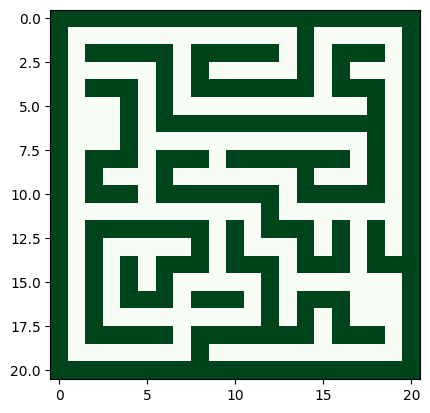

In [3]:
# (you are encouraged to look at the API of 'imshow')
plt.imshow(build_maze("maze_20x20.txt"), cmap="Greens")

**_Define START and GOAL states within the maze_**


In [4]:
START = (1, 1)
GOAL = (19, 19)
# Goal for 25x25 maze would be (25,25); but it is OK if it varies by +/- 1 based on your maze.

**_'Find_the_edges' builds the graph for the maze, assuming that the robot can move only in the four directions (Up, Down, Right, Left)._**


In [5]:
def Find_the_edges(maze):
    """
    para1: numpy array of the maze structure
    return graph of the connected nodes
    """
    graph = {}
    grid_size = len(maze)
    for i in range(grid_size):
        for j in range(grid_size):
            if maze[i][j] != 1:
                adj = []
                eles = []
                if i - 1 >= 0:
                    eles.append((i - 1, j))
                if i + 1 < grid_size:
                    eles.append((i + 1, j))
                if j - 1 >= 0:
                    eles.append((i, j - 1))
                if j + 1 < grid_size:
                    eles.append((i, j + 1))
                for ele in eles:
                    if maze[ele[0]][ele[1]] == 0 or maze[ele[0]][ele[1]] == "3":
                        adj.append((ele[0], ele[1]))
                graph[(i, j)] = adj
    return graph


def Find_the_edgesv2(maze):
    """
    para1: numpy array of the maze structure
    return graph of the connected nodes
    """

    def add_node_if_inside(i, j):
        if i >= 0 and i < grid_size and j >= 0 and j < grid_size:
            if maze[i][j] != 1:
                eles.append((i, j))

    graph = {}
    grid_size = len(maze)
    for i in range(grid_size):
        for j in range(grid_size):
            if maze[i][j] != 1:
                adj = []
                eles = []
                # if i - 1 >= 0:
                #     eles.append((i - 1, j))
                # if i + 1 < grid_size:
                #     eles.append((i + 1, j))
                # if j - 1 >= 0:
                #     eles.append((i, j - 1))
                # if j + 1 < grid_size:
                #     eles.append((i, j + 1))
                add_node_if_inside(i - 1, j)
                add_node_if_inside(i + 1, j)
                add_node_if_inside(i, j - 1)
                add_node_if_inside(i, j + 1)
                add_node_if_inside(i - 1, j - 1)
                add_node_if_inside(i - 1, j + 1)
                add_node_if_inside(i + 1, j - 1)
                add_node_if_inside(i + 1, j + 1)
                for ele in eles:
                    if maze[ele[0]][ele[1]] == 0 or maze[ele[0]][ele[1]] == "3":
                        adj.append((ele[0], ele[1]))
                graph[(i, j)] = adj
    return graph

**_Breadth First Search (BFS)_**


In [6]:
from collections import deque


def BreadthFirst(graph, start, goal):
    """
    para1: connected graph
    para2: Starting node
    para3: ending Node
    return1: list of visited nodes
    return2: nodes of shortest path
    """
    queue = deque([([start], start)])
    visited = set()

    while queue:
        path, current = queue.popleft()
        # print(path, current)
        if current == goal:
            # print( path)
            return visited, np.array(path)
        if current in visited:
            continue
        # print(current)
        visited.add(current)
        for neighbour in graph[current]:
            # print(graph[current])
            p = list(path)
            p.append(neighbour)
            queue.append((p, neighbour))
    return None


"""
visited nodes - mark them as -3 in maze numpy array 
path- mark them as -1 in maze numpy array
and Visualize the maze
"""

'\nvisited nodes - mark them as -3 in maze numpy array \npath- mark them as -1 in maze numpy array\nand Visualize the maze\n'

In [7]:
# example for visualization of maze with visited nodes and shortest path
# visited nodes are marked by '-3', the final path is marked by '-1'.
maze1 = build_maze("maze_20x20.txt")
graph = Find_the_edges(maze1)
visited, path = BreadthFirst(graph, START, GOAL)
for i in visited:
    maze1[i[0], i[1]] = -3
for i in path:
    maze1[i[0], i[1]] = -1

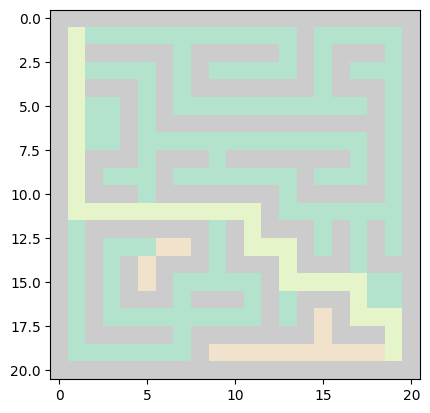

In [8]:
plt.imshow(maze1, cmap="Pastel2")

-   **_gray cells_** means the walls of the maze
-   **_dark green cells_** means the visited cells of the maze
-   **_light green cells_** means the shortest path of the maze
-   **_light brown_** means the unvisited cells of the maze


**\*A\*\*** **_-search_**


In [9]:
import heapq


class PriorityQueue:
    def __init__(self):
        self.elements = []

    def empty(self) -> bool:
        return not self.elements

    def put(self, item, priority):
        heapq.heappush(self.elements, (priority, item))

    def get(self):
        return heapq.heappop(self.elements)[1]


def astar_path(graph, maze, start, goal, heuristic, weight=1):
    """
    para1: connected graph
    para2: Starting node
    para3: ending Node
    return1: list of visited nodes
    return2: nodes of shortest path
    """
    frontier = PriorityQueue()
    frontier.put(start, 0)
    came_from = {}
    cost_so_far = {}
    came_from[start] = None
    cost_so_far[start] = 0
    while not frontier.empty():
        current = frontier.get()
        if current == goal:
            break
        # print(graph[current])
        for next in graph[current]:
            maze[current] = -1  # Making a change here, passing a maze to the function
            new_cost = cost_so_far[current] + 1
            if next not in cost_so_far or new_cost < cost_so_far[next]:
                cost_so_far[next] = new_cost
                ######
                # you can make the interface of 'astar_path' more robust by providing a heuristic as a parameter
                ###
                priority = new_cost + weight * heuristic(next, goal)
                frontier.put(next, priority)
                came_from[next] = current
    current = goal
    path = []
    while current != start:
        path.append(current)
        # print(came_from[current])
        current = came_from[current]
    path.append(start)
    path.reverse()
    return came_from, path


"""
visited nodes - mark them as -3 in maze numpy array 
path- mark them as -1 in maze numpy array
and Visualize the maze
"""

'\nvisited nodes - mark them as -3 in maze numpy array \npath- mark them as -1 in maze numpy array\nand Visualize the maze\n'

**_Dijkstra Algorithm_**


In [10]:
def dijkstra_algorithm(graph, start_node, GOAL):
    """
    para1: connected graph
    para2: Starting node
    para3: ending Node
    return1: list of visited nodes
    return2: nodes of shortest path
    """
    unvisited_nodes = list(graph.keys())

    # We'll use this dict to save the cost of visiting each node and update it as we move along the graph
    shortest_path = {}

    # We'll use this dict to save the shortest known path to a node found so far
    previous_nodes = {}

    # We'll use max_value to initialize the "infinity" value of the unvisited nodes
    max_value = sys.maxsize
    for node in unvisited_nodes:
        shortest_path[node] = max_value
    # However, we initialize the starting node's value with 0
    shortest_path[start_node] = 0

    # The algorithm executes until we visit all nodes
    while GOAL in unvisited_nodes:
        # The code block below finds the node with the lowest score
        current_min_node = None
        for node in unvisited_nodes:  # Iterate over the nodes
            if current_min_node == None:
                current_min_node = node
            elif shortest_path[node] < shortest_path[current_min_node]:
                current_min_node = node

        # The code block below retrieves the current node's neighbors and updates their distances
        neighbors = graph[current_min_node]
        for neighbor in neighbors:
            tentative_value = shortest_path[current_min_node] + 1
            if tentative_value < shortest_path[neighbor]:
                shortest_path[neighbor] = tentative_value
                # We also update the best path to the current node
                previous_nodes[neighbor] = current_min_node

        # After visiting its neighbors, we mark the node as "visited"
        unvisited_nodes.remove(current_min_node)

    current = GOAL
    path = []
    while current != START:
        path.append(current)
        # print(previous_nodes[current])
        current = previous_nodes[current]
    path.append(START)
    path.reverse()
    return previous_nodes, path


"""
visited nodes - mark them as -3 in maze numpy array 
path- mark them as -1 in maze numpy array
and Visualize the maze
"""

'\nvisited nodes - mark them as -3 in maze numpy array \npath- mark them as -1 in maze numpy array\nand Visualize the maze\n'

### Task - 1


Build your maze with dimentions 25 x 25 and a similar complexity (number of obstacles/fences)
as in the maze provided in 'maze_20x20.txt'. Check that there exists a path between START at the
(1, 1) and the GOAL at (25, 25) in your maze. Store your maze to 'my_maze_25x25.txt'. Visualize your maze.
Use your maze in the below tasks.


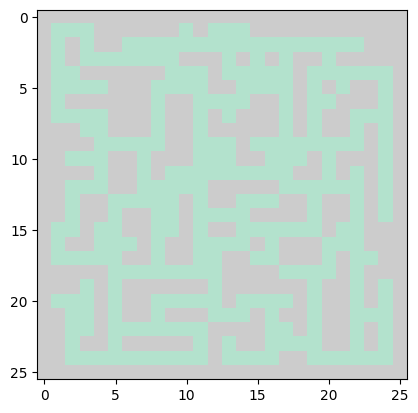

In [11]:
maze2 = build_maze("my_maze_25x25.txt")
plt.imshow(maze2, cmap="Pastel2")  # here is the visualization of the maze2

### Task - 2


A\* algorithm requires a heuristic function. You will try two following heuristics:

-   Euclidean distance between the cell coordinates
-   Manhattan distance between the cell coordinates


In [12]:
def Euclidean_distance(node1, node2):
    """
    para1: is a tuple which contains the coorinates of the source node
    para2: is a tuple which contains the coorinates of the source node
    return: Euclidean distance between the 2 nodes
    """
    return ((node1[0] - node2[0]) ** 2 + (node1[1] - node2[1]) ** 2) ** 0.5

In [13]:
# implement the Manhattan distance between the 2 nodes, and update the code for A* accordingly
def Manhattan_distance(node1, node2):
    """
    para1: is a tuple which contains the coorinates of the source node
    para2: is a tuple which contains the coorinates of the source node
    return: Manhattan distance between the 2 nodes
    """
    return abs(node1[0] - node2[0]) + abs(node1[1] - node2[1])


#     refer to https://xlinux.nist.gov/dads/HTML/manhattanDistance.html

Run A\* with these two heuristic functions for W=1 and find the shortest path and its length in the maze. You can update the interface of astar_path to accept W and a heuristic function


Text(0.5, 1.0, 'Manhattan Distance | Path: 47')

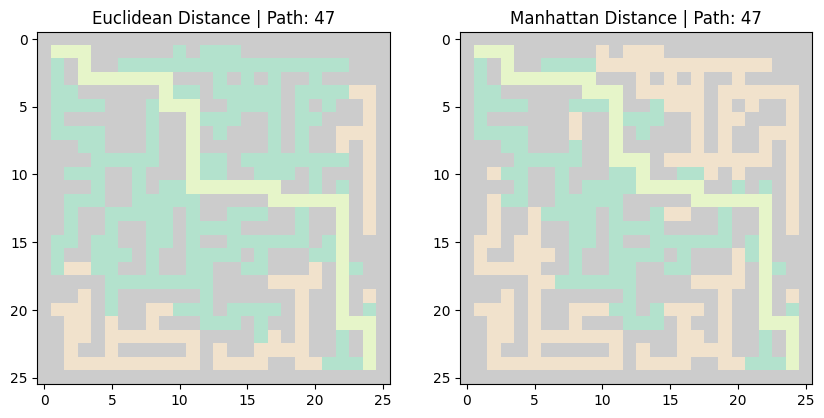

In [14]:

# Solving with A* and visualise
# visited, path = BreadthFirst(graph, START, GOAL)
# heuristic 1
START = (1, 1)
GOAL = (24, 24)


def solve_maze(maze_file, search_algorithm, *args, graph_algorithm=Find_the_edges, return_arrays=False):
    '''
    returns: maze, visited, path (in order)
    '''
    maze = build_maze(maze_file)
    maze_placeholder = maze.copy()
    graph = graph_algorithm(maze)
    if search_algorithm == astar_path:
        visited, path = search_algorithm(graph, maze_placeholder, *args)
    else:
        visited, path = search_algorithm(graph, *args)
    for i in visited:
        maze[i[0], i[1]] = -3
    for i in path:
        maze[i[0], i[1]] = -1
    if return_arrays:
        return maze, visited, path
    return maze


maze2_1, visited2_1, path2_1 = solve_maze(
    "my_maze_25x25.txt", astar_path, START, GOAL, Euclidean_distance, 1, return_arrays=True
)

maze2_2, visited2_1, path2_1 = solve_maze(
    "my_maze_25x25.txt", astar_path, START, GOAL, Manhattan_distance, 1, return_arrays=True
)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(maze2_1, cmap="Pastel2")
ax[0].set_title(f"Euclidean Distance | Path: {len(path2_1)}")
ax[1].imshow(maze2_2, cmap="Pastel2")
ax[1].set_title(f"Manhattan Distance | Path: {len(path2_1)}")

- The length of path is same for both heuristics, but the number of visited nodes and the **path is different**

### Task - 3


In this task you are asked to solve the maze with 4 different weights, W, in A\* for each of the heurstic function mentioned above. Visualize the solution for each W and each heurstic on a separate plot in the same format as in the examle above. **_Choose a broad set of values for W to see the difference._** What is the length of the shortest path in each case?


Text(0.5, 0.98, 'Manhattan Distance')

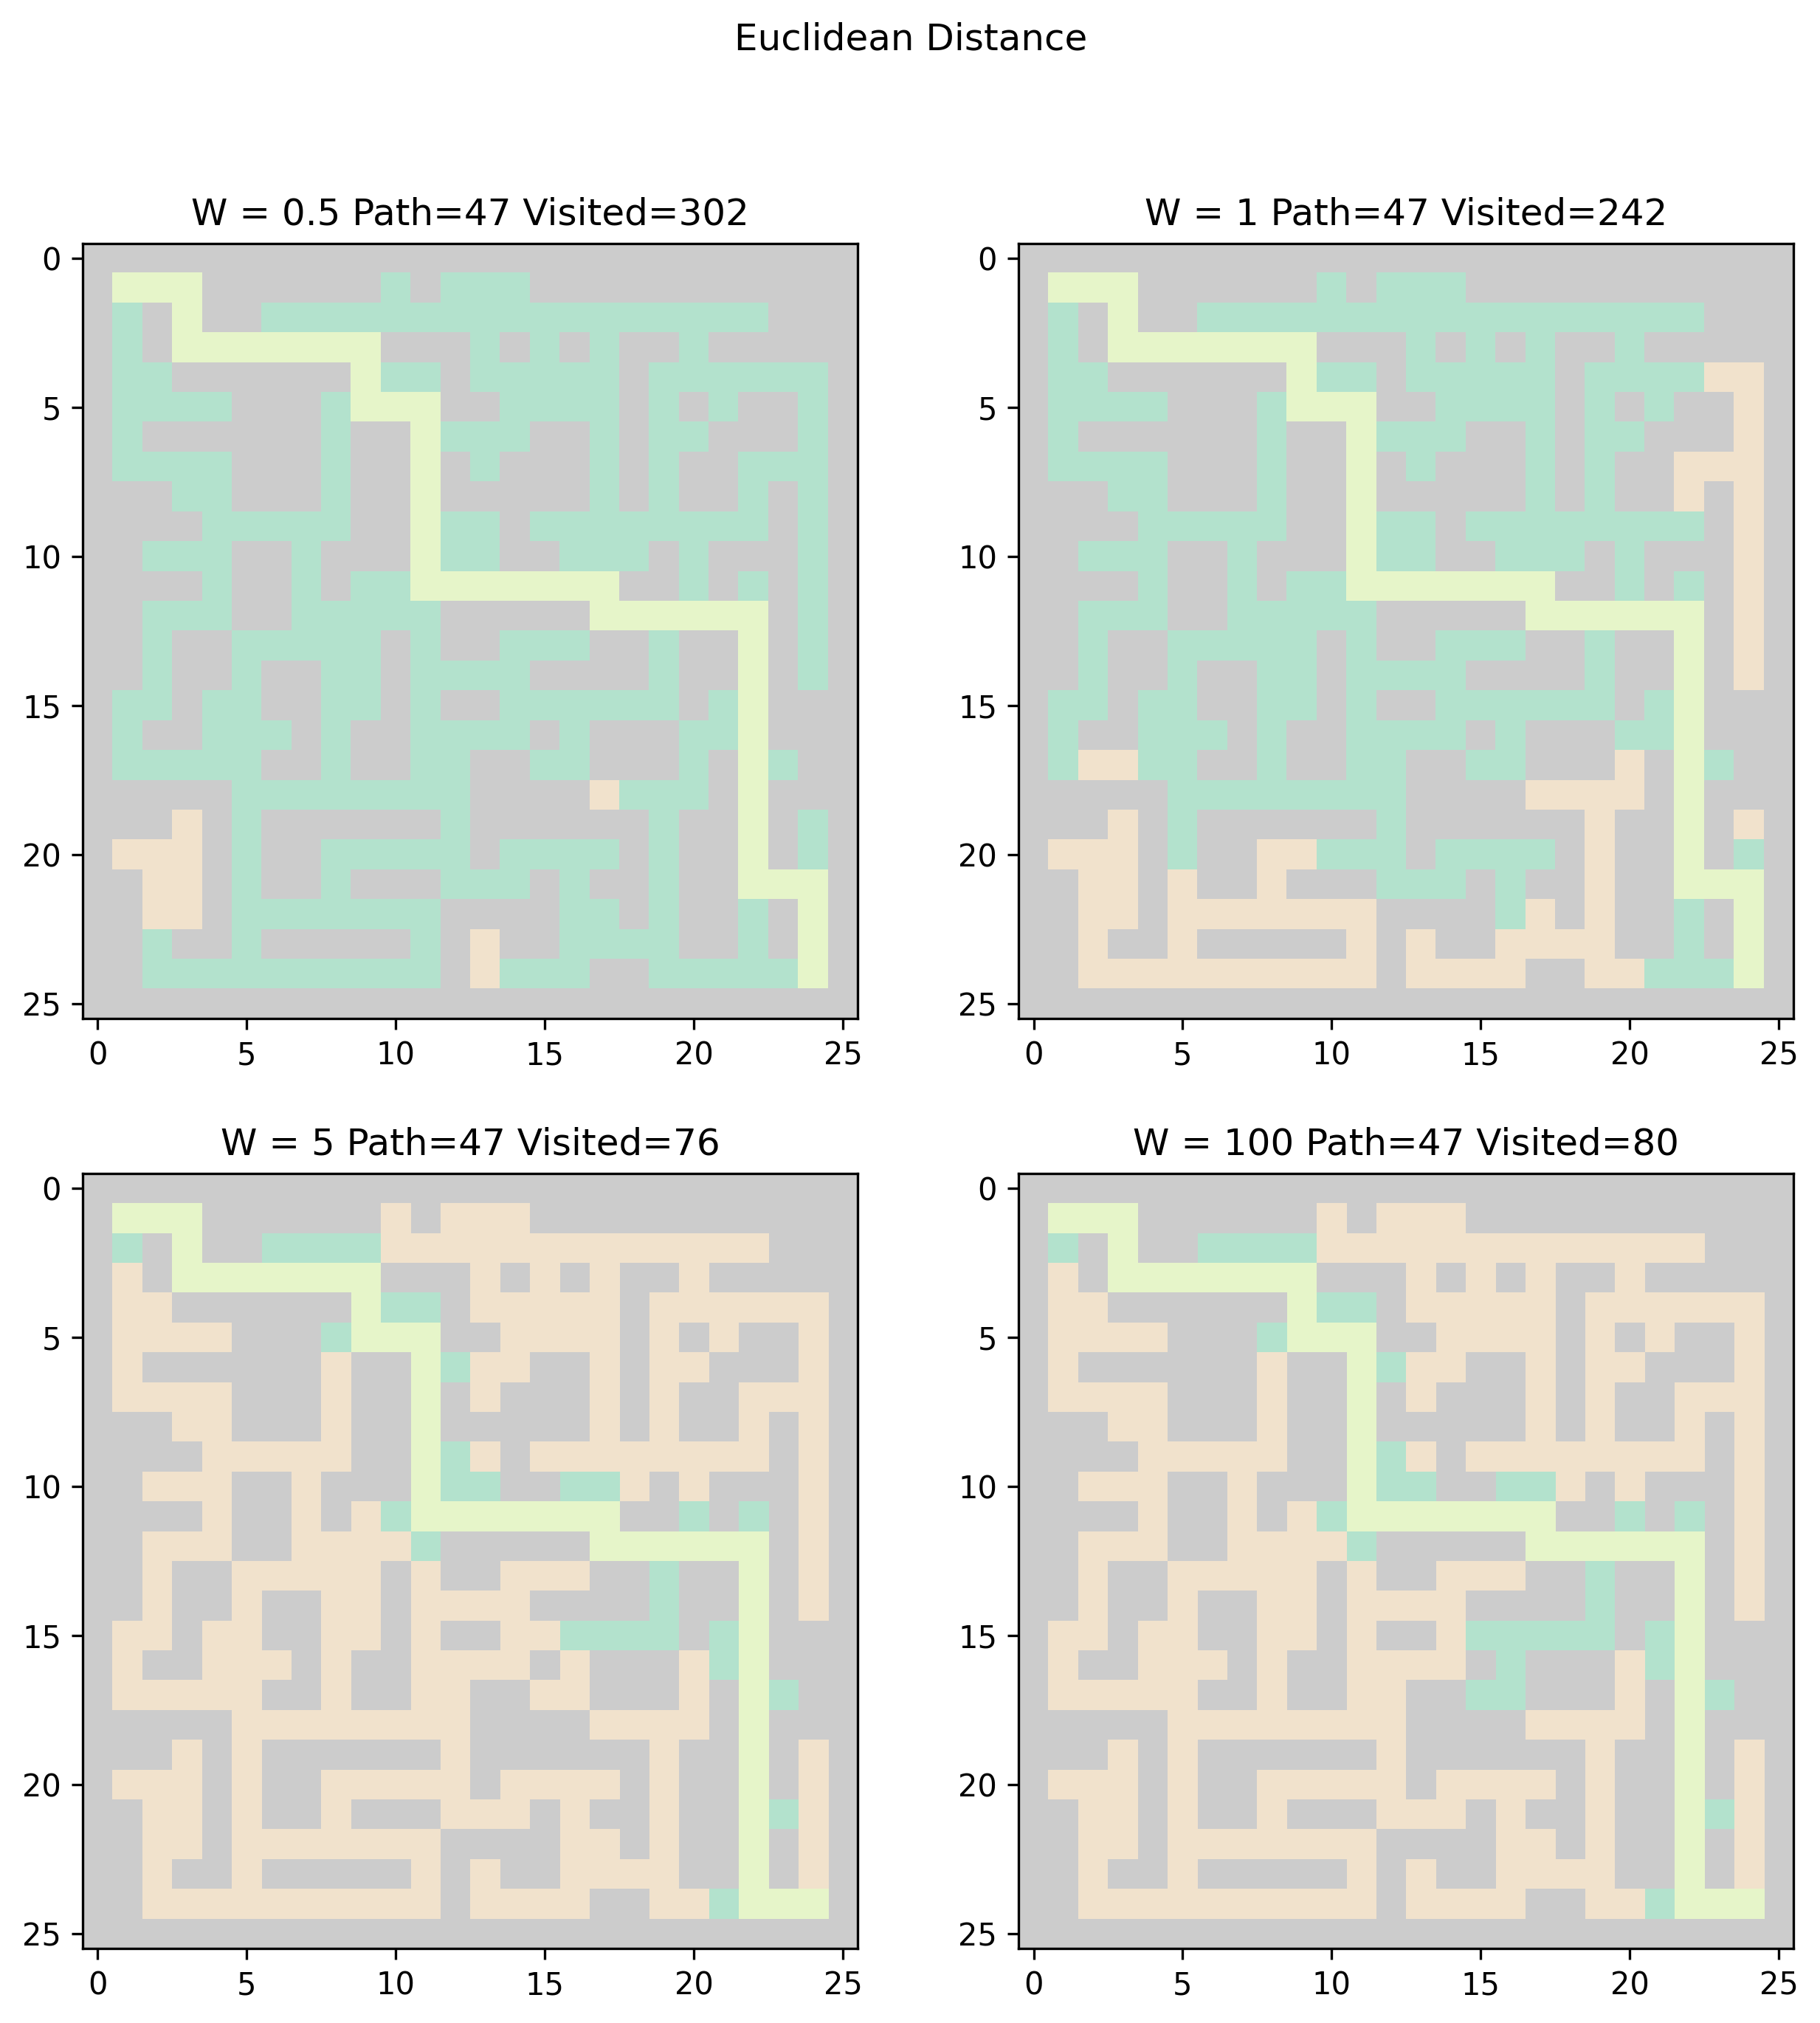

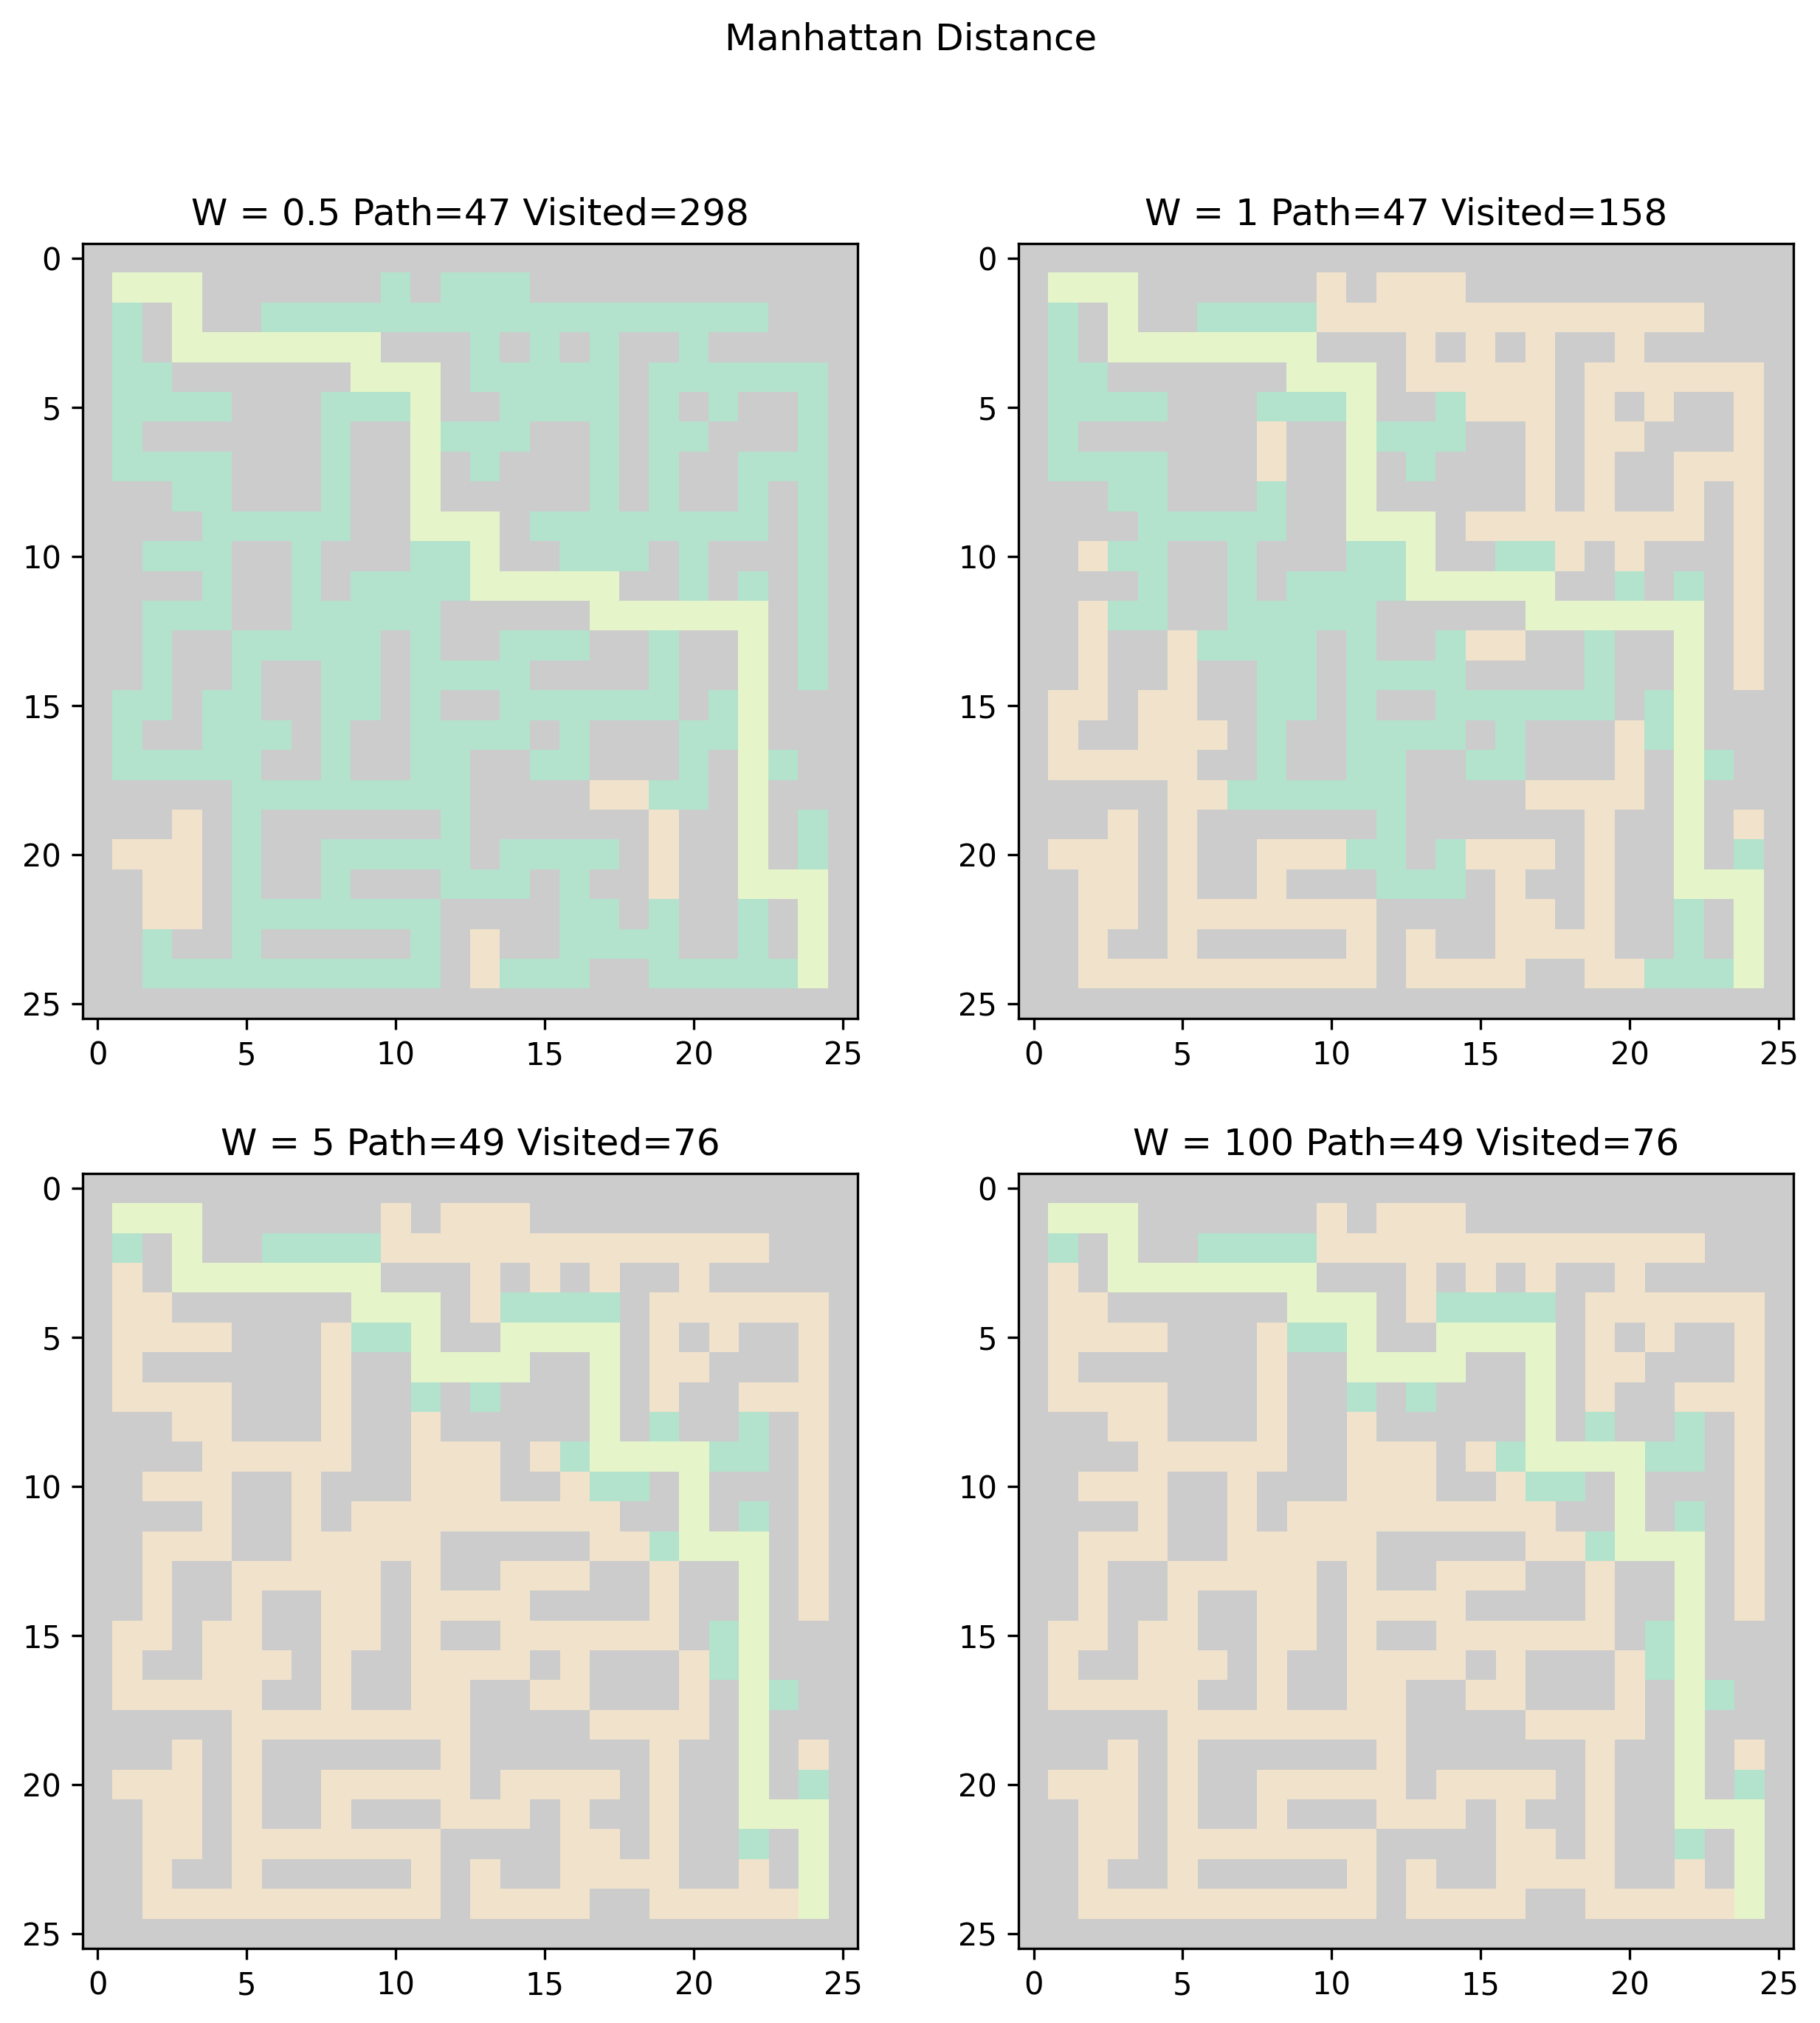

In [15]:
range_of_Ws = [0.5, 1, 5, 100]
mazes = [
    solve_maze("my_maze_25x25.txt", astar_path, START, GOAL, Euclidean_distance, w, return_arrays=True)
    for w in range_of_Ws
]

mazes2 = [
    solve_maze("my_maze_25x25.txt", astar_path, START, GOAL, Manhattan_distance, w, return_arrays=True)
    for w in range_of_Ws

]

fig, ax = plt.subplots(len(range_of_Ws) // 2, len(range_of_Ws) // 2, figsize=(10, 10), dpi=300)
for i in range(len(range_of_Ws)):
    ax[i // 2, i % 2].imshow(mazes[i][0], cmap="Pastel2")
    ax[i // 2, i % 2].set_title(
        f"W = {range_of_Ws[i]} Path={len(mazes[i][2])} Visited={len(mazes[i][1])}"
    )
fig.suptitle("Euclidean Distance")

fig1, ax1 = plt.subplots(len(range_of_Ws) // 2, len(range_of_Ws) // 2, figsize=(10, 10), dpi=300)
for i in range(len(range_of_Ws)):
    ax1[i // 2, i % 2].imshow(mazes2[i][0], cmap="Pastel2")
    ax1[i // 2, i % 2].set_title(
        f"W = {range_of_Ws[i]} Path={len(mazes2[i][2])} Visited={len(mazes2[i][1])}"
    )
fig1.suptitle("Manhattan Distance")

Explain what changes you observe for the different weights and why it occurs.


Tried 4 weights - [0.5, 1, 5, 100]
Modified the title of the above plot to include the weight, shortest path returned, and the number of visited cells.

**For Euclidean Distance heuristic**

`W = 0.5`

Here, euristic has less weightage in the decision process, thus it makes the algorithm to think visit more spaces, which is visible by more number of visited cells but gives the shortest path of length `47`, but with steps of `302`.

`W = 1`

Here, compared to `w=0.5` the algorithm visits less number of cells, `242` down from `302`, still giving the same path length of `47`. More weighted heuristic allowed it to visit less states.

`W = 5`

The number of visited cells is `76`, ~75% reduction of the visited cells from `w=0.5`, with the same path of `47` length.

`W = 100`

The number of visited cells is `80`, ~200 steps less from the initial weighted heuristic.An interesting observation is that the number increased here, suggesting, heuristics may not always be effective in all cases from on point of view, but great in reducing the search space

> This exercise, perfectly aligns with Professor's teachings: in cases where just finding a solution is more importnat, heuristic can go a long ways with little to moderate increase in cost, with almost 75% reduction in memory usage.

**For Manhattan Distance heuristic**

`W = 0.5`

Here, lower weightage of heuristic so path length of `47`, and steps of `298`, lesser than with above h

`W = 1`

Here, the drop is fairly significant `158` from `298` with the same path. The maze could be better solved with heuristic. 

`W = 5`

From here, the path slightly increases to `49` from `47`, but the number of steps is `76`, which is another significant drop from `158`.

`W = 100`

Have the same results as with `W=5`

> The results are consistent with the previous heuristic, but the number of visited cells is significantly less, which is a good sign of the effectiveness of the heuristic.

### Task - 4


Plot on plt.subplot(121) a) time taken VS Weights

Plot on plt.subplot(122) b) search space (expanded nodes) VS Weights

-- add titles, axis labels, and legends.


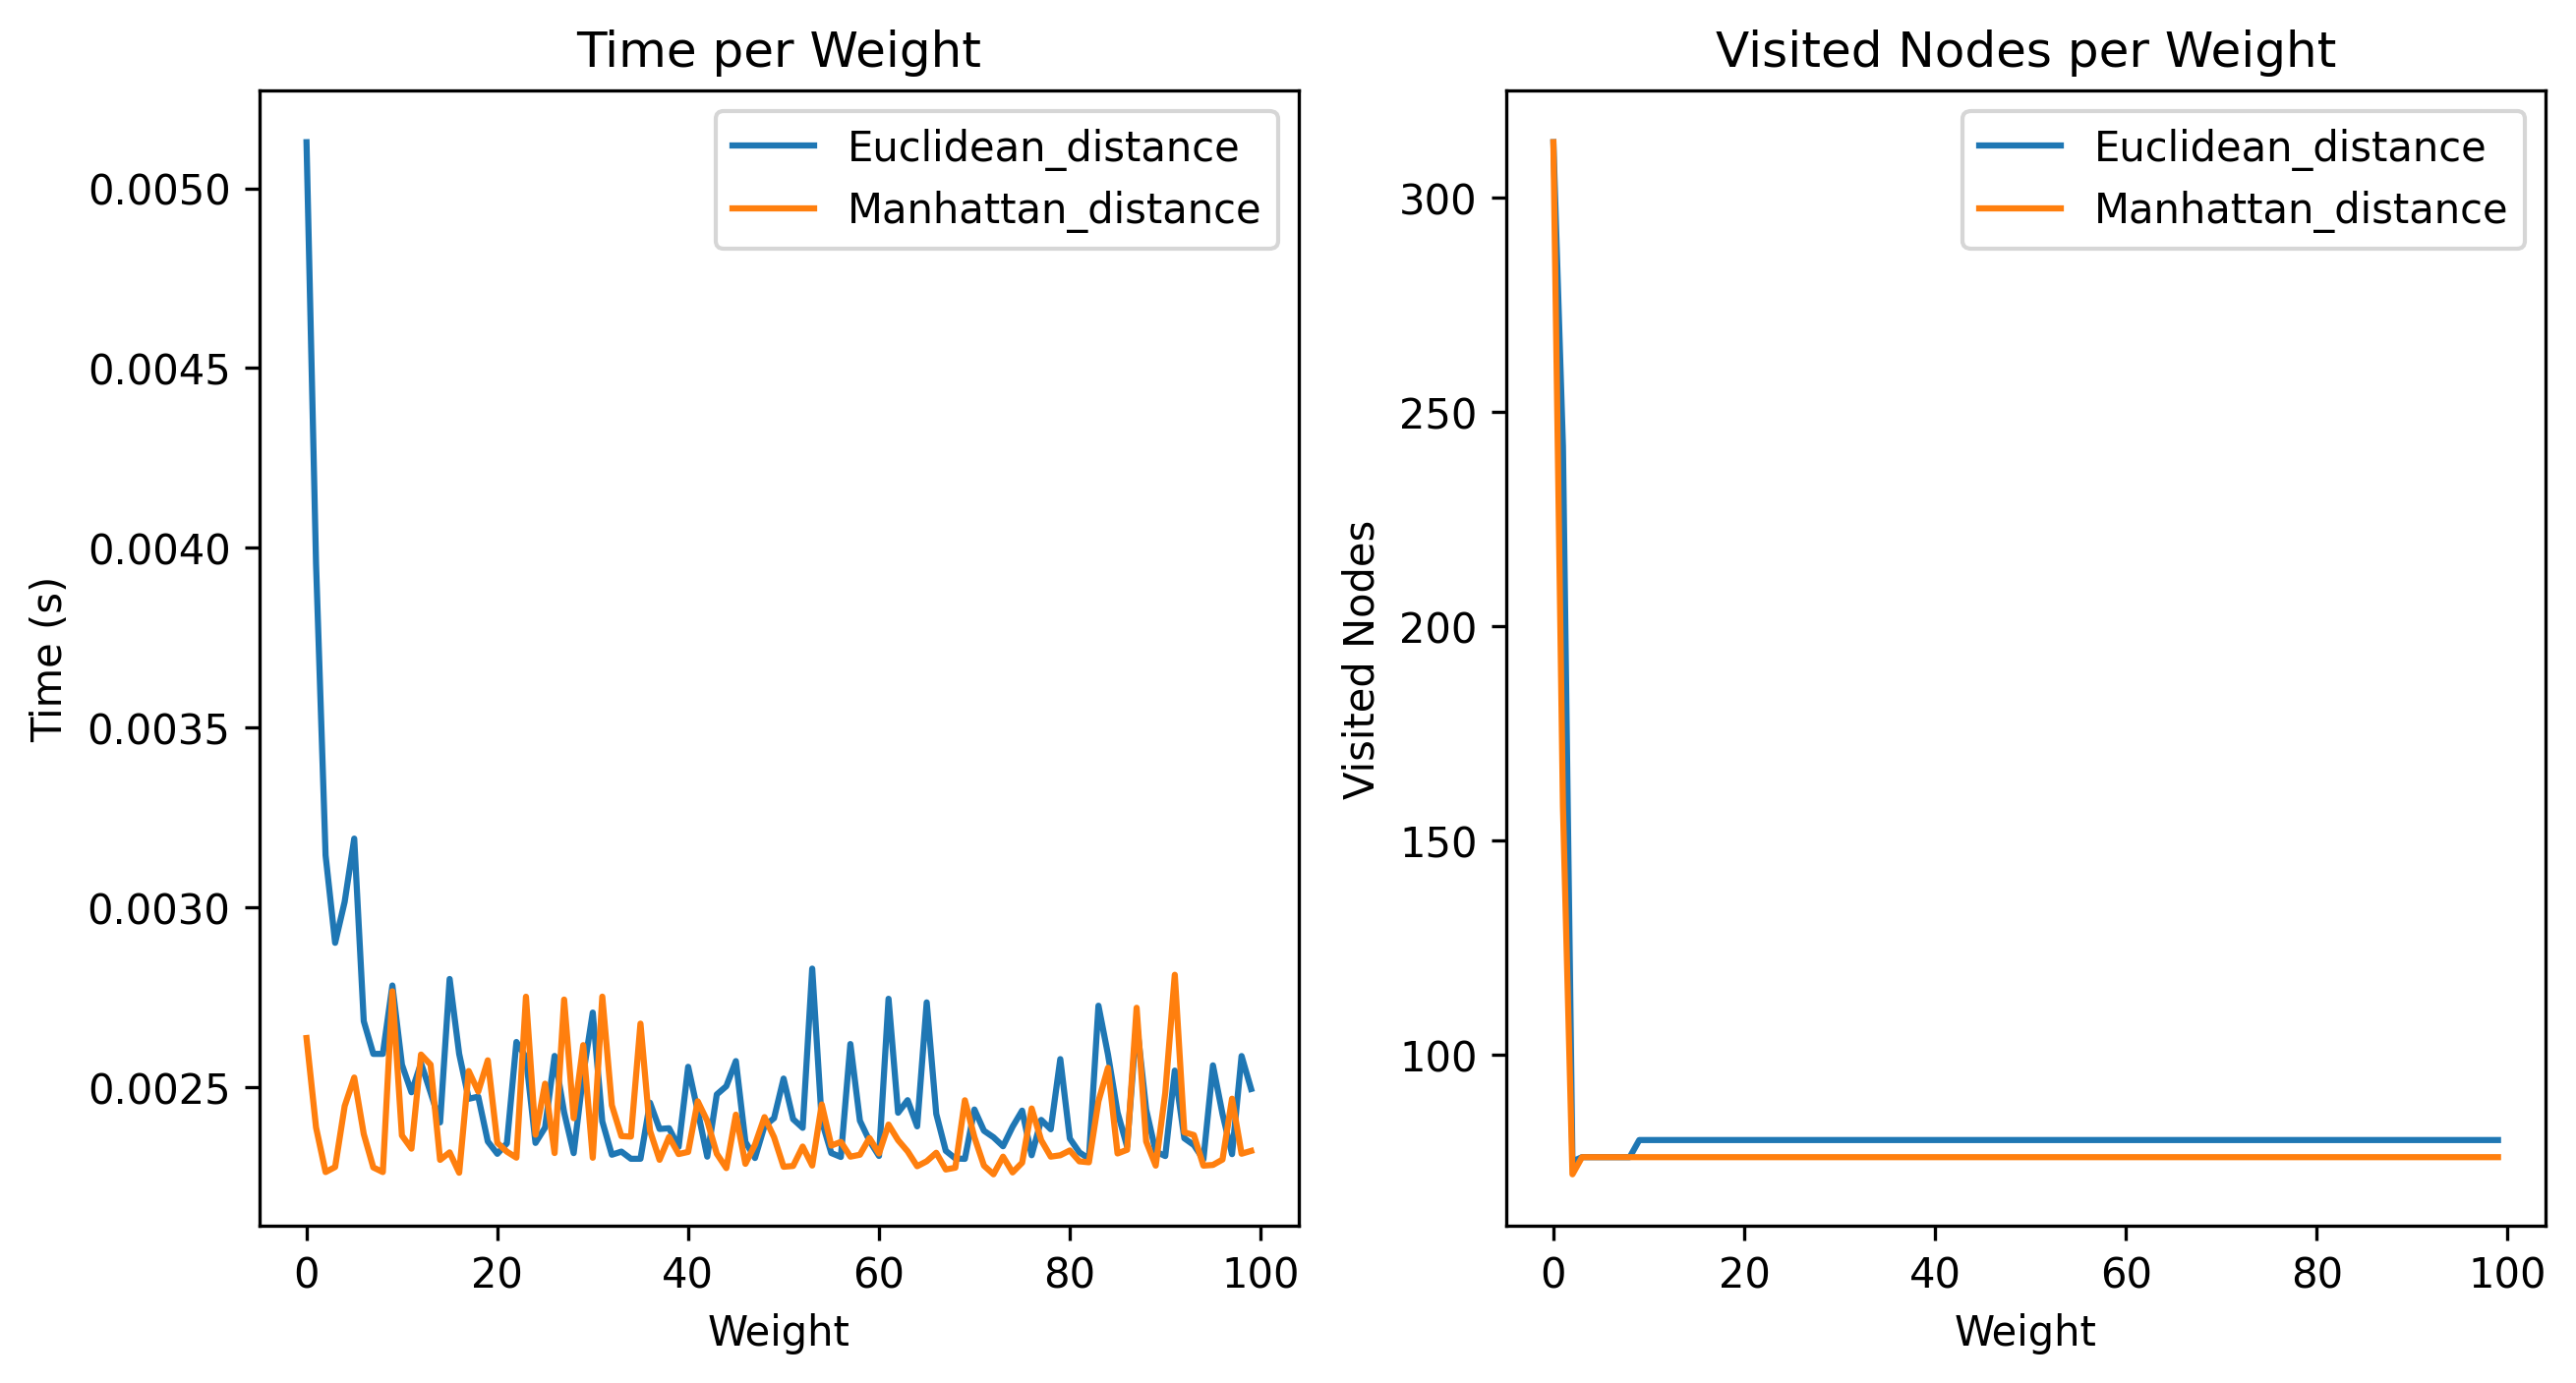

In [29]:
def time_func(func, *args):
    import time

    start = time.time()
    func(*args)
    return time.time() - start


range_of_Ws = range(0, 100, 1)
time_per_weight = [
    [time_func(
        solve_maze, "my_maze_25x25.txt", astar_path, START, GOAL, Euclidean_distance, w
    )
    for w in range_of_Ws],
    [time_func(
        solve_maze, "my_maze_25x25.txt", astar_path, START, GOAL, Manhattan_distance, w
    )
    for w in range_of_Ws]
]

visited_nodes_per_weight = [
    [len(
        solve_maze(
            "my_maze_25x25.txt", astar_path, START, GOAL, Euclidean_distance, w, return_arrays=True
        )[1]
    )
    for w in range_of_Ws],
    [len(
        solve_maze(
            "my_maze_25x25.txt", astar_path, START, GOAL, Manhattan_distance, w, return_arrays=True
        )[1]
    )
    for w in range_of_Ws]
    
]


fig, ax = plt.subplots(1, 2, figsize=(10, 5), dpi=300)
ax[0].plot(range_of_Ws, time_per_weight[0], label="Euclidean_distance")
ax[0].plot(range_of_Ws, time_per_weight[1], label="Manhattan_distance")
ax[0].set_title("Time per Weight")
ax[0].set_xlabel("Weight")
ax[0].set_ylabel("Time (s)")
ax[0].legend()

ax[1].plot(range_of_Ws, visited_nodes_per_weight[0], label="Euclidean_distance")
ax[1].plot(range_of_Ws, visited_nodes_per_weight[1], label="Manhattan_distance")
ax[1].set_title("Visited Nodes per Weight")
ax[1].set_xlabel("Weight")
ax[1].set_ylabel("Visited Nodes")
ax[1].legend()

> Take away here is to see the trend of the graphs, the time is pretty high during w = [0, 5 or 10] and there after saturates, 

> The same is visible in the visited nodes per weight graph, its high at 0 heuristic, but then reduces drastically and then saturates.

> Between heuristics, the maze design is such a way that, more reliance on straight line distance hurts the model as observed in right side `Euclidean_distance` plot, but still signifies the amount of reduction in search space.

### Task - 5


Solve the maze with the Dijkstra algorithm, and visualize the solution in the maze. What is the length of the shortest path?


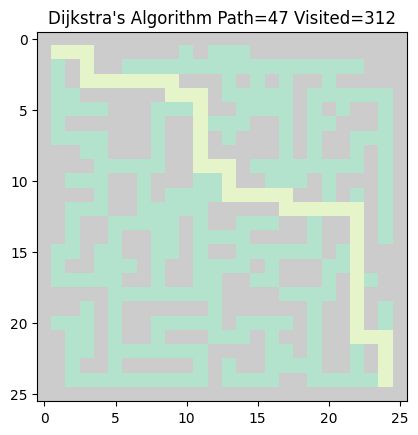

<Figure size 3000x3000 with 0 Axes>

In [17]:
maze2, visited, path = solve_maze(
    "my_maze_25x25.txt", dijkstra_algorithm, START, GOAL, return_arrays=True
)
plt.imshow(maze2, cmap="Pastel2")
plt.title(
    f"Dijkstra's Algorithm Path={len(path)} Visited={len(visited)}"
)
plt.figure(figsize=(10, 10), dpi=300)
plt.show()

> Length of the shortest path is `47`, with `312` visited cells.

### Task - 6


Solve the maze with the BFS algorithm, and visualize the solution in the maze. What is the length of the shortest path?


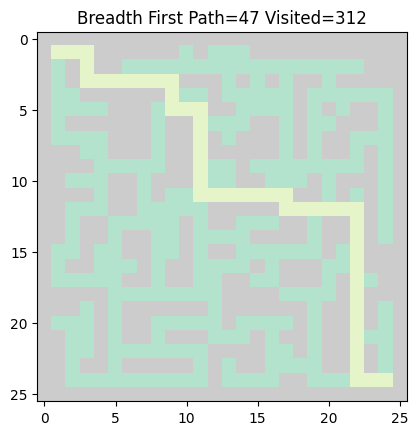

<Figure size 3000x3000 with 0 Axes>

In [18]:
maze2, visited, path = solve_maze(
    "my_maze_25x25.txt", BreadthFirst, START, GOAL, return_arrays=True
)
plt.imshow(maze2, cmap="Pastel2")
plt.title(
    f"Breadth First Path={len(path)} Visited={len(visited)}"
)
plt.figure(figsize=(10, 10), dpi=300)
plt.show()

> The length of the shortest path is `47`, with `312` visited cells, same as Dijkstra.

### Task - 7


Choose 3 random START and GOAL states, and repeat the below tasks:

-   Run A\* algorithm with the two heuristic functions for W=1.

-   Run Dijkstra algorithm.

-   Run BFS algorithm.

Visualize the solution for each. Explain your observations.


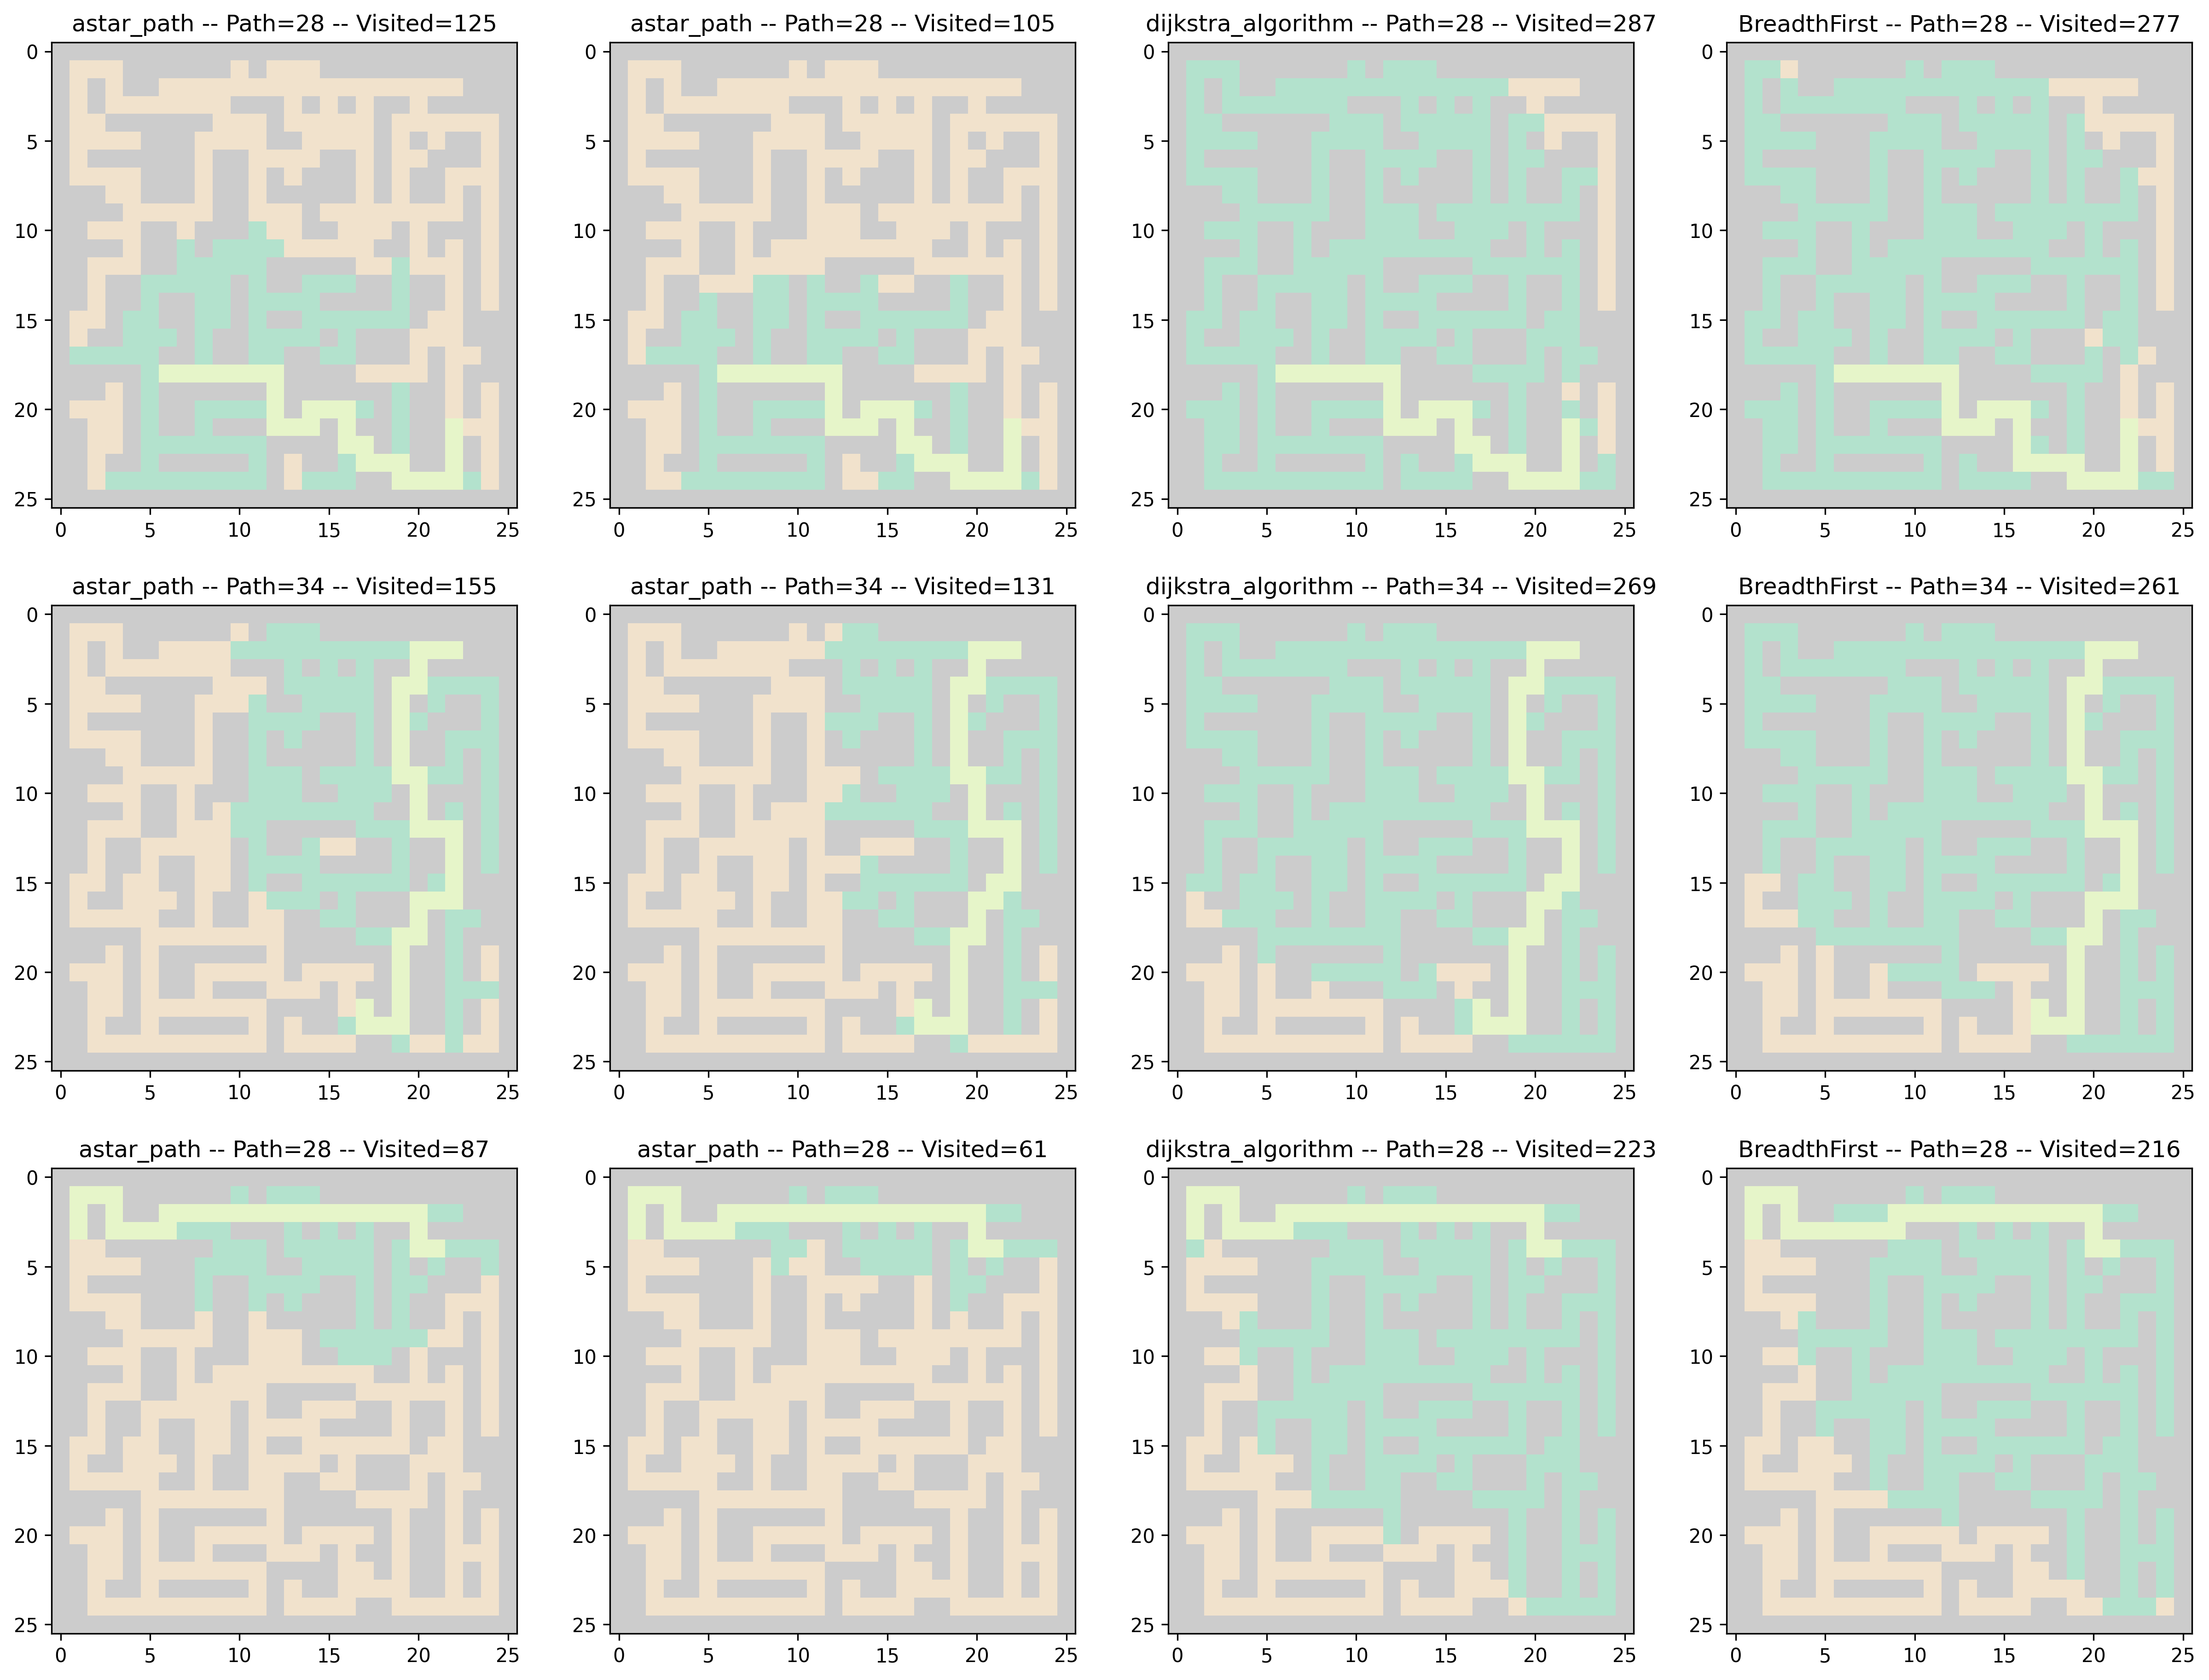

In [19]:
maze = build_maze("my_maze_25x25.txt")
graph = Find_the_edges(maze)
import random

fig, ax = plt.subplots(3, 4, figsize=(20, 15), dpi=300)
for i in range(3):
    first = True
    START, GOAL = random.sample(list(graph.keys()), k=2)
    for j, algo in enumerate(
        [astar_path, astar_path, dijkstra_algorithm, BreadthFirst]
    ):
        if algo is astar_path:
            heuristic = Euclidean_distance if first else Manhattan_distance
            maze, visited, path = solve_maze("my_maze_25x25.txt", algo, START, GOAL, heuristic, 1, return_arrays=True)
            first = False
        else:
            maze, visited, path = solve_maze("my_maze_25x25.txt", algo, START, GOAL, return_arrays=True)
        ax[i, j].imshow(maze, cmap="Pastel2")
        ax[i, j].set_title(
            f"{algo.__name__} -- Path={len(path)} -- Visited={len(visited)}"
        )

> As visualised, the A* algorithm is the most efficient, it gave the shortest path all the times, with way less number of visited cells. Dijkstra being the worst with most number of visited cells and BFS closer to Dijsktra than A*.


> A* gave the shortest path all the times, but I understand this may not be the case always as indicated in Task 3

> In A*, Manhattan distance evidently is the better heuristic with less number of cells visited

### Task - 8


The inital assumation which we made in the Find_the_edges() is the robot can only move in UP, DOWN, LEFT and RIGHT. Now it can move diagonally as well. Modifiy the function and repeat the below tasks:

-   Run A\* algorithm with the two heuristic functions for W=1.

-   Run Dijkstra algorithm.

-   Run BFS algorithm.

Visualize the solution for each. Explain your observations


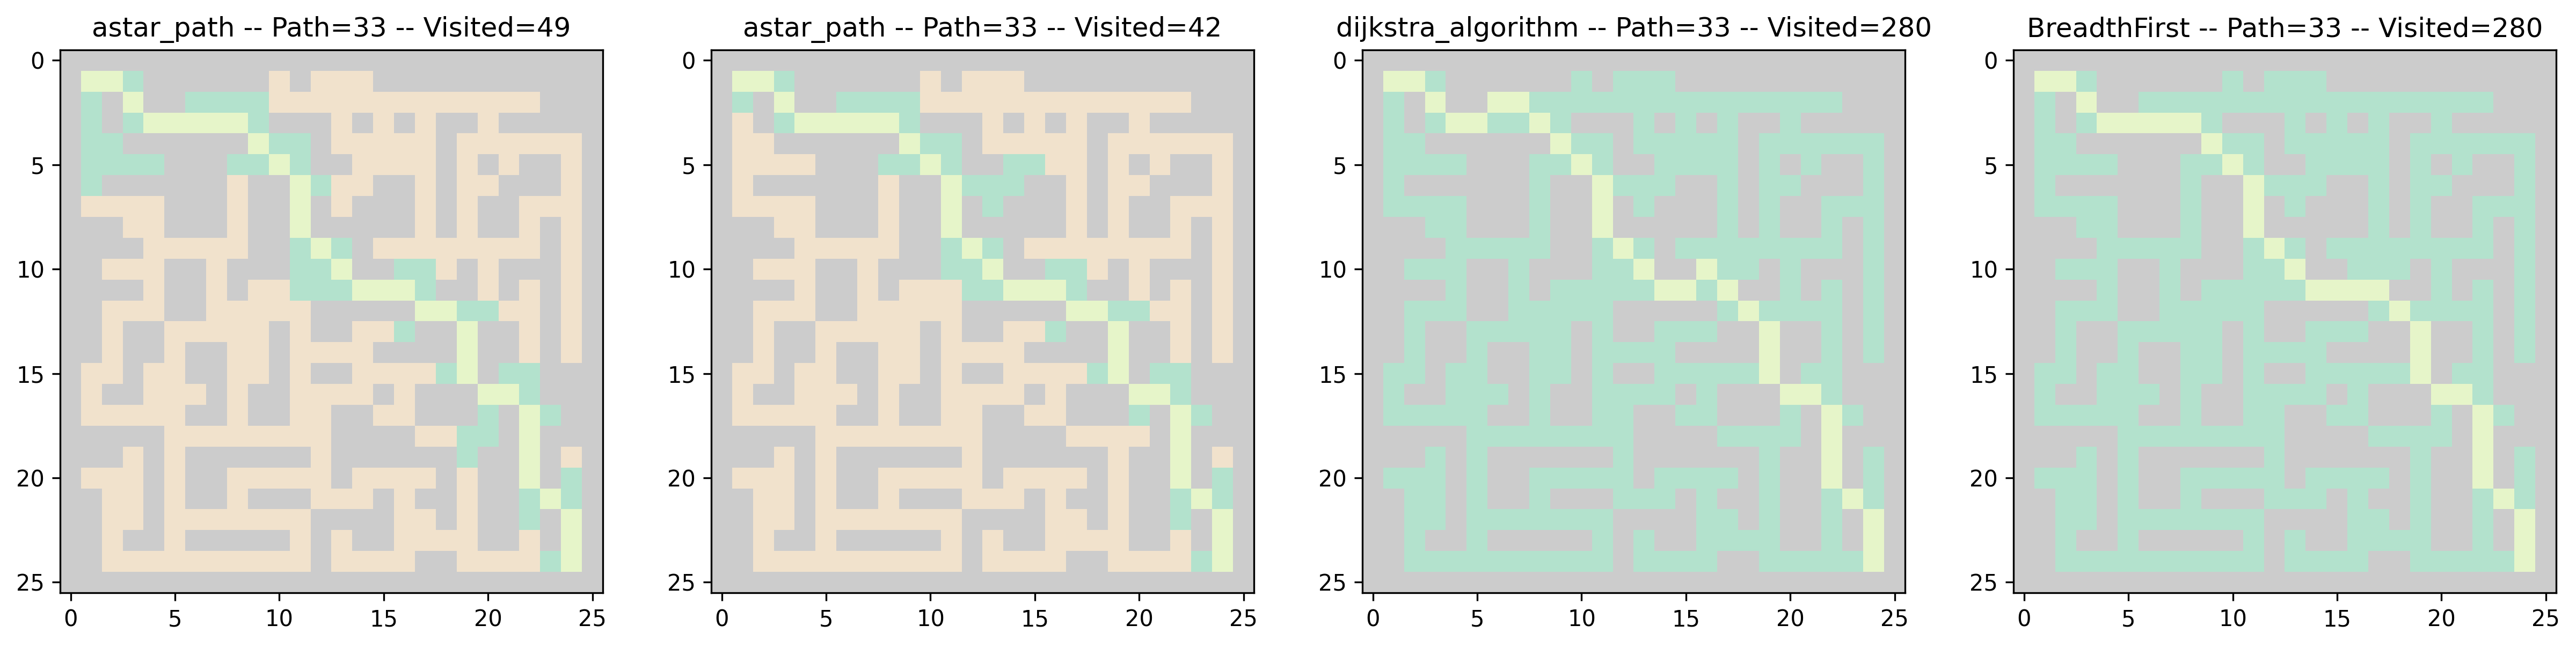

In [20]:
maze = build_maze("my_maze_25x25.txt")
graph = Find_the_edgesv2(maze)
START, GOAL = (1, 1), (24, 24)
fig, ax = plt.subplots(1, 4, figsize=(20, 15), dpi=300, squeeze=False)
first = True
for j, algo in enumerate([astar_path, astar_path, dijkstra_algorithm, BreadthFirst]):
    if algo is astar_path:
        heuristic = Euclidean_distance if first else Manhattan_distance
        maze, visited, path = solve_maze(
            "my_maze_25x25.txt",
            algo,
            START,
            GOAL,
            heuristic,
            1,
            graph_algorithm=Find_the_edgesv2,
            return_arrays=True,
        )
        first = False
    else:
        maze, visited, path = solve_maze(
            "my_maze_25x25.txt", algo, START, GOAL, graph_algorithm=Find_the_edgesv2, return_arrays=True
        )
    ax[0, j].imshow(maze, cmap="Pastel2")
    ax[0, j].set_title(
        f"{algo.__name__} -- Path={len(np.argwhere(maze == -1))} -- Visited={len(np.argwhere(maze == -3))}"
    )

> -   The only observable difference from above is that, it can **now move along the corners of the maze**, so the shortest path `47`, drops to `33`.

> -   From left to right corner, Dijsktra and BFS are still the same.

> -  A* with Manhattan distance is the best heuristic, with the least number of visited cells.

### Bonus Task (10 pt): Solving "Sliding Tile Puzzle" with A\*-Search

The initial and the final configurations are given at the image below.
You can use **the number of displaced tiles** as a heuristics function, $h_1$. Use W=1.
Add your code and print the optimal action sequence (which tile to move) from the intial to the final configuration.
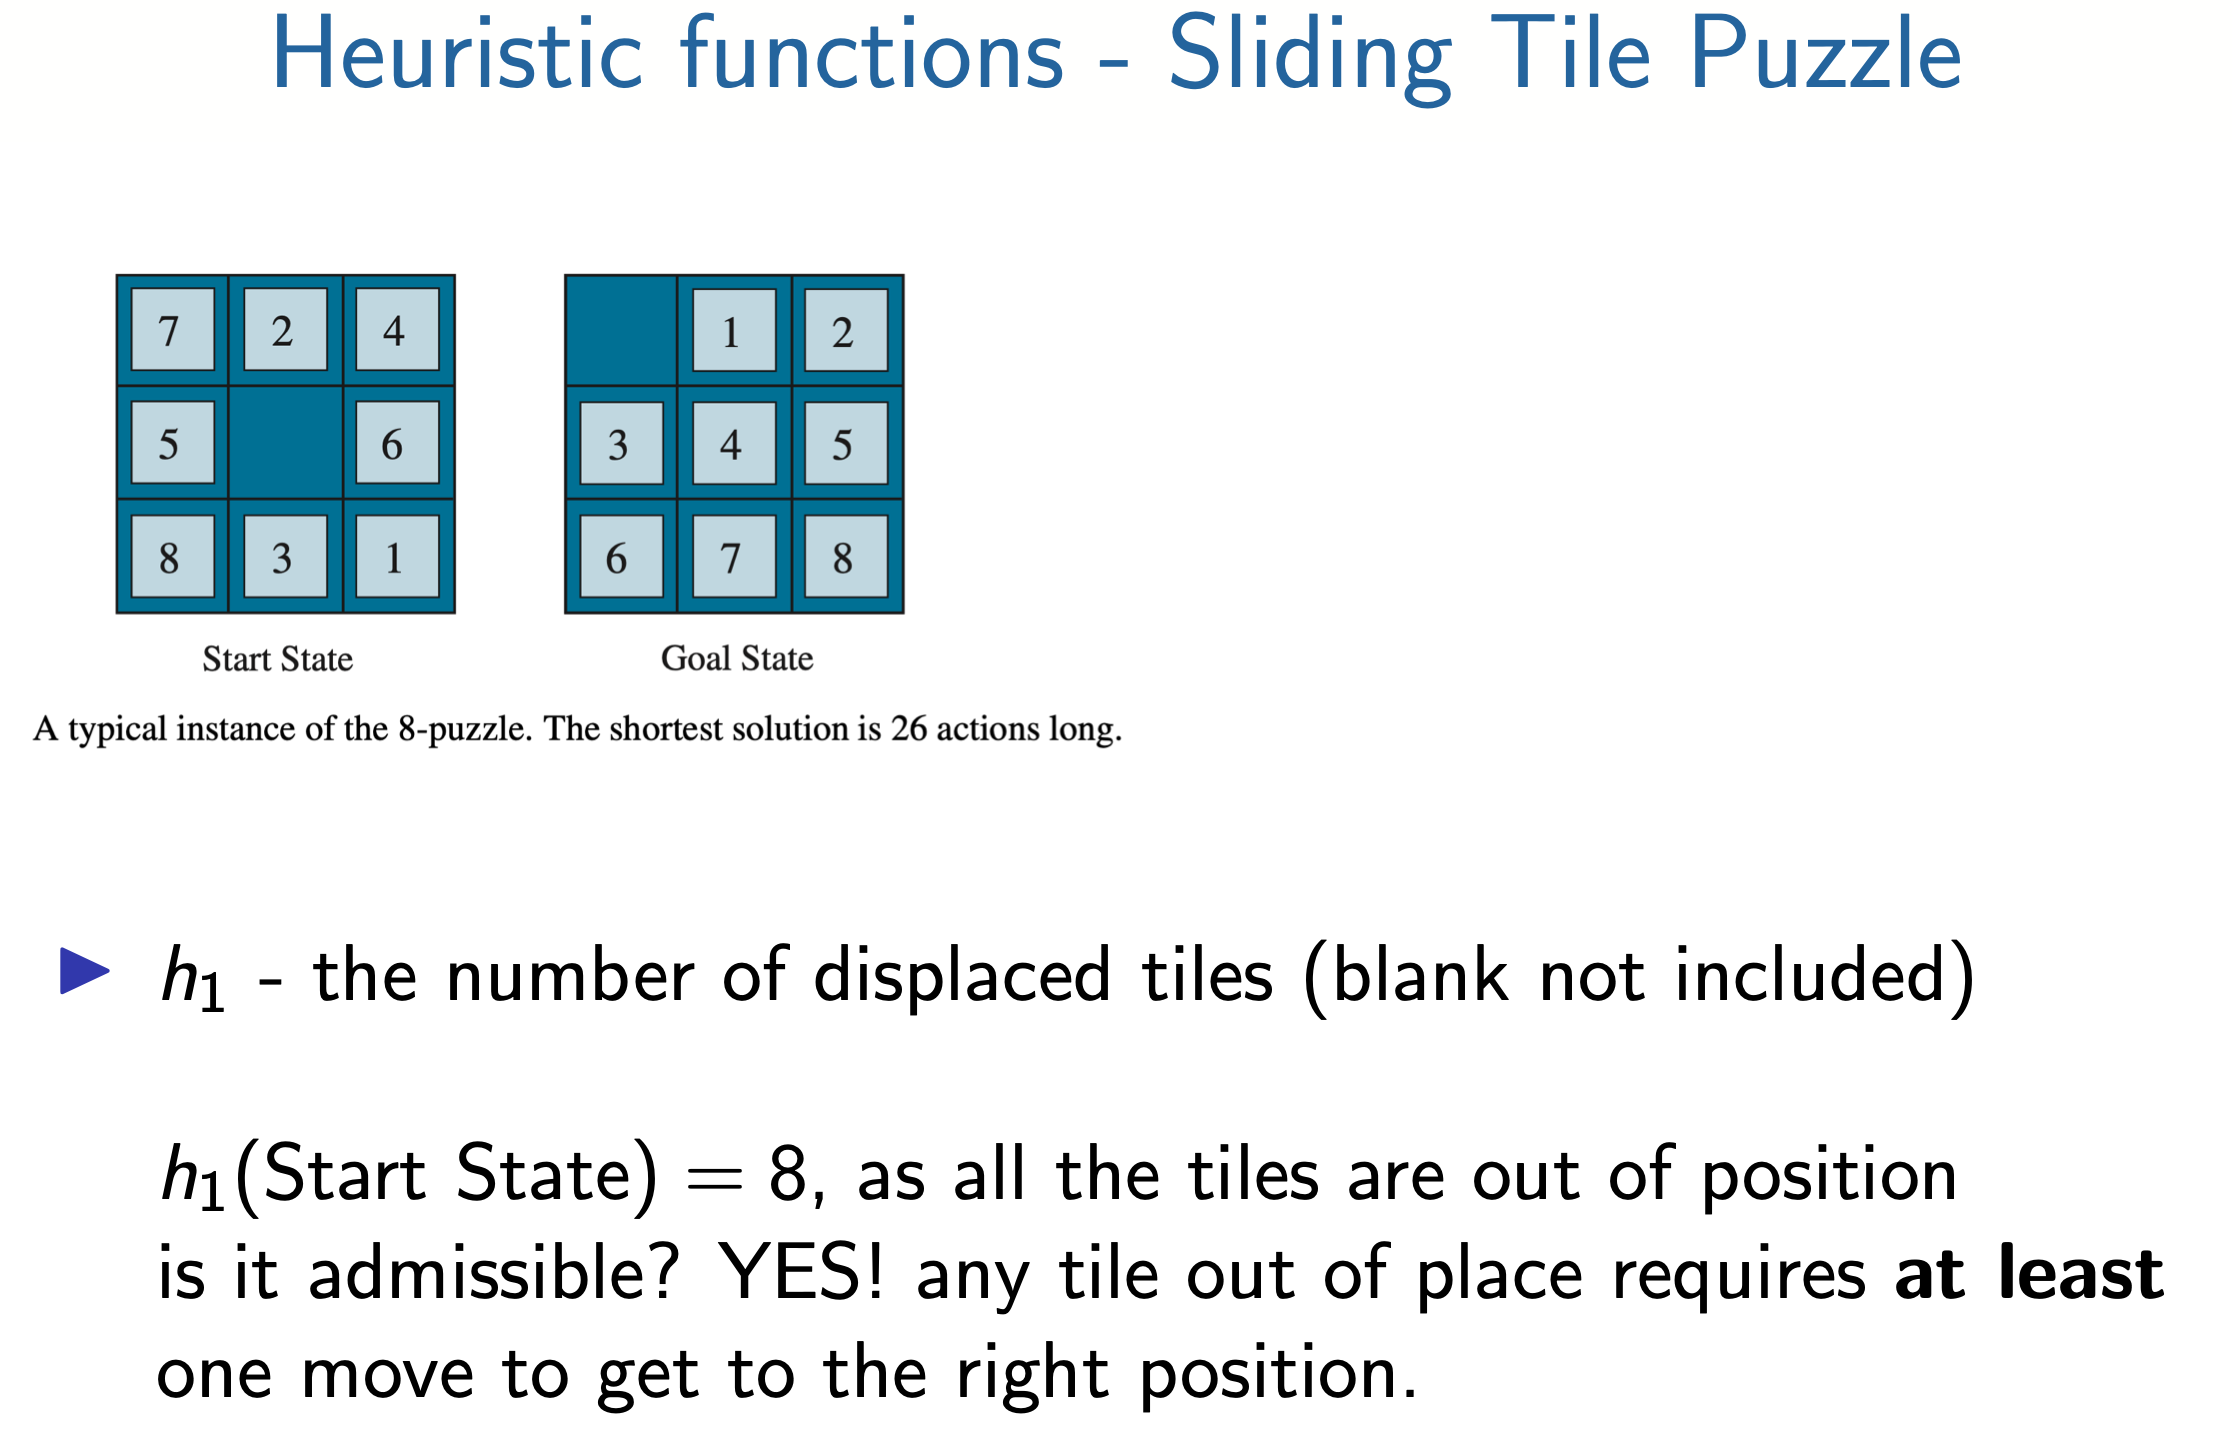


In [21]:
class SlidingTile:
    def __init__(self, start_state, goal_state):
        # a 3x3 puzzle
        self.start_state = start_state
        self.goal_state = goal_state

    def heuristic_minimal(self, state):
        """
        para1: state of the puzzle
        return: heuristic value
        """
        # 1 for each of the 8 tiles that are not in their goal position
        if type(state) == tuple:
            state = np.array(state).reshape(3, 3)
        return np.abs(state - self.goal_state).sum()

    def heuristic_manhattan(self, state):
        """
        para1: state of the puzzle
        return: heuristic value
        """
        # manhattan distance betweene each state value in the state and the goal state
        h = 0
        if type(state) == tuple:
            state = np.array(state)
        if state.shape != (3, 3):
            state = state.reshape(3, 3)
        for i in range(len(state)):
            for j in range(len(state[i])):
                if state[i][j] != self.goal_state[i][j]:
                    actual_place = np.argwhere(self.goal_state == state[i][j]).flatten()
                    h += abs(actual_place[0] - i) + abs(actual_place[1] - j)
        return h

    def check_move(self, node, move):
        # 3x3 puzzle
        node = node.flatten()
        if node[0] + move[0] < 0 or node[0] + move[0] > 2:
            return False
        if node[1] + move[1] < 0 or node[1] + move[1] > 2:
            return False
        return True

    def possible_trajectories(self, state):
        # return the state, with the move
        # up, down, left, right

        # find the 0
        if type(state) == tuple:
            state = np.array(state).reshape(3, 3)
        zero = np.argwhere(state == 0)

        states = []
        moves = ((-1, 0), (1, 0), (0, -1), (0, 1))
        for move in moves:
            if not self.check_move(zero, move):
                continue
            new_state = state.copy()
            new_state[zero[0][0], zero[0][1]] = new_state[
                zero[0][0] + move[0], zero[0][1] + move[1]
            ]
            new_state[zero[0][0] + move[0], zero[0][1] + move[1]] = 0
            states.append(new_state)
        return states

    def bind(self, state):
        if type(state) == tuple:
            return state
        return tuple(state.flatten())

    def astar_path(self, heuristic, w=1):
        """
        para1: heuristic function
        return: shortest path
        """
        frontier = PriorityQueue()
        frontier.put(self.bind(self.start_state), 0)
        came_from = {}
        cost_so_far = {}
        came_from[self.bind(self.start_state)] = None
        cost_so_far[self.bind(self.start_state)] = 0

        while not frontier.empty():
            current = frontier.get()
            if np.array_equal(current, self.goal_state.flatten()):
                break
            for next in self.possible_trajectories(self.bind(current)):
                new_cost = cost_so_far[self.bind(current)] + 1
                if (
                    self.bind(next) not in cost_so_far
                    or new_cost < cost_so_far[self.bind(next)]
                ):
                    cost_so_far[self.bind(next)] = new_cost
                    priority = new_cost + w*heuristic(self.bind(next))
                    frontier.put(self.bind(next), priority)
                    came_from[self.bind(next)] = current

        current = self.goal_state
        path = []

        while not np.array_equal(current, self.start_state.flatten()):
            path.append(self.bind(current))
            current = came_from[self.bind(current)]

        path.append(self.bind(self.start_state))
        path.reverse()

        return came_from, path

In [22]:
_3x3_start = np.array([[7, 2, 4], [5, 0, 6], [8, 3, 1]])

_3x3_end = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])

In [23]:
st = SlidingTile(_3x3_start, _3x3_end)
visited, path = st.astar_path(st.heuristic_manhattan)

In [24]:
len(path)

27

/var/folders/bc/fhc14r6d5nl6k9n0dg7zyr6w0000gn/T/ipykernel_54484/1150935250.py:28: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use buffer_rgba instead.
  fig.canvas.tostring_rgb(), dtype=np.uint8


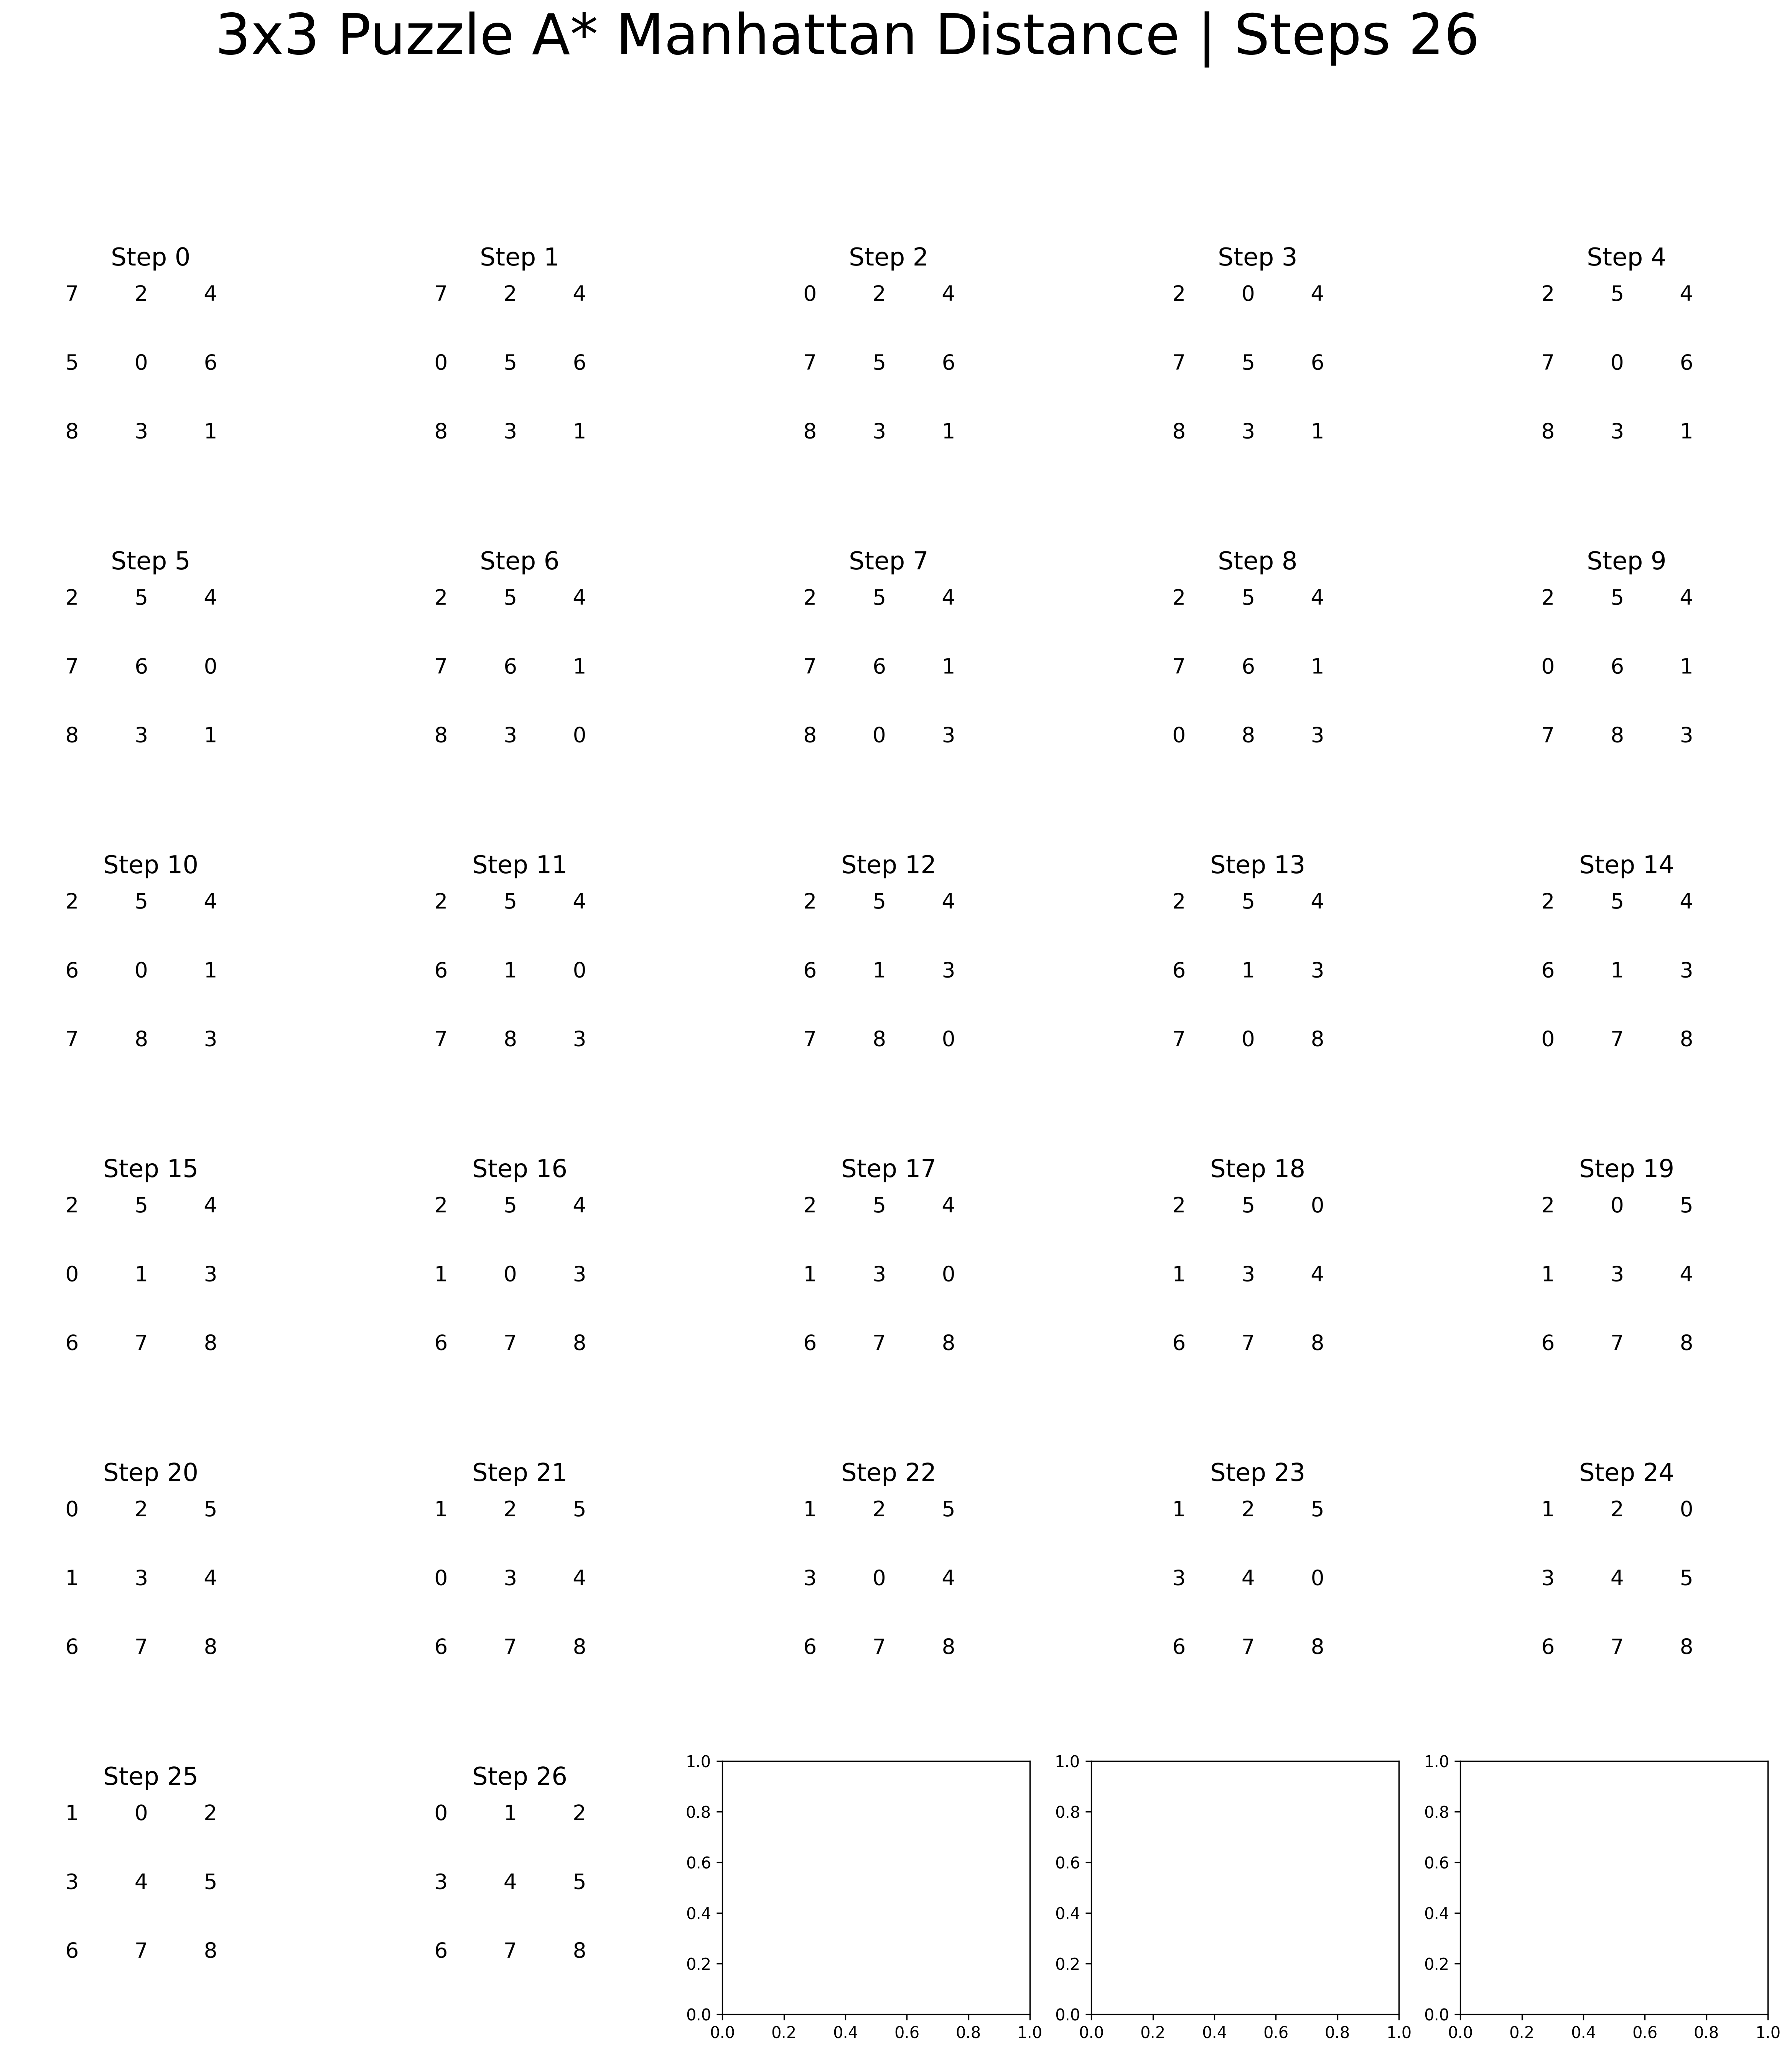

In [25]:
# create a 3x3 puzzle, add text inside the blocks from each row in paths
# print the puzzle
import imageio
import math


def viz(
    paths,
    plot_figs=True,
    save_gif=False,
    gif_name="3x3_puzzle.gif",
    title="3 x 3 Puzzle",
):
    figs = []
    step = 0
    for path in paths:
        fig, ax = plt.subplots(3, 3, figsize=(5, 5), dpi=300)
        path = np.array(path).reshape(3, 3)
        for i in range(3):
            for j in range(3):
                ax[i, j].text(0.5, 0.5, str(path[i][j]), fontsize=30, ha="center")
                ax[i, j].axis("off")
        fig.suptitle(f"Step {step}", fontsize=35, x=0.55)
        step += 1

        fig.canvas.draw()
        img = np.frombuffer(
            fig.canvas.tostring_rgb(), dtype=np.uint8
        )  # deprecated tostring_rgb in matplotlib 3.8
        img = img.reshape(fig.canvas.get_width_height()[::-1] + (3,))
        plt.close("all")
        figs.append(img)

    if plot_figs:
        # plot max 5 figs on a single row, so cols = 5
        cols = 5
        rows = math.ceil(len(figs) / cols)
        fig, ax = plt.subplots(rows, cols, figsize=(20, 20), dpi=300)
        for i in range(len(figs)):
            ax[i // cols, i % cols].imshow(figs[i])
            ax[i // cols, i % cols].axis("off")
        fig.suptitle(title, fontsize=35)

    if save_gif:
        imageio.mimsave(gif_name, figs, fps=1)


viz(path, plot_figs=True, title=f"3x3 Puzzle A* Manhattan Distance | Steps {len(path)-1}")

In [26]:
st = SlidingTile(_3x3_start, _3x3_end)
visited, path = st.astar_path(st.heuristic_minimal)

/var/folders/bc/fhc14r6d5nl6k9n0dg7zyr6w0000gn/T/ipykernel_54484/1150935250.py:28: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use buffer_rgba instead.
  fig.canvas.tostring_rgb(), dtype=np.uint8


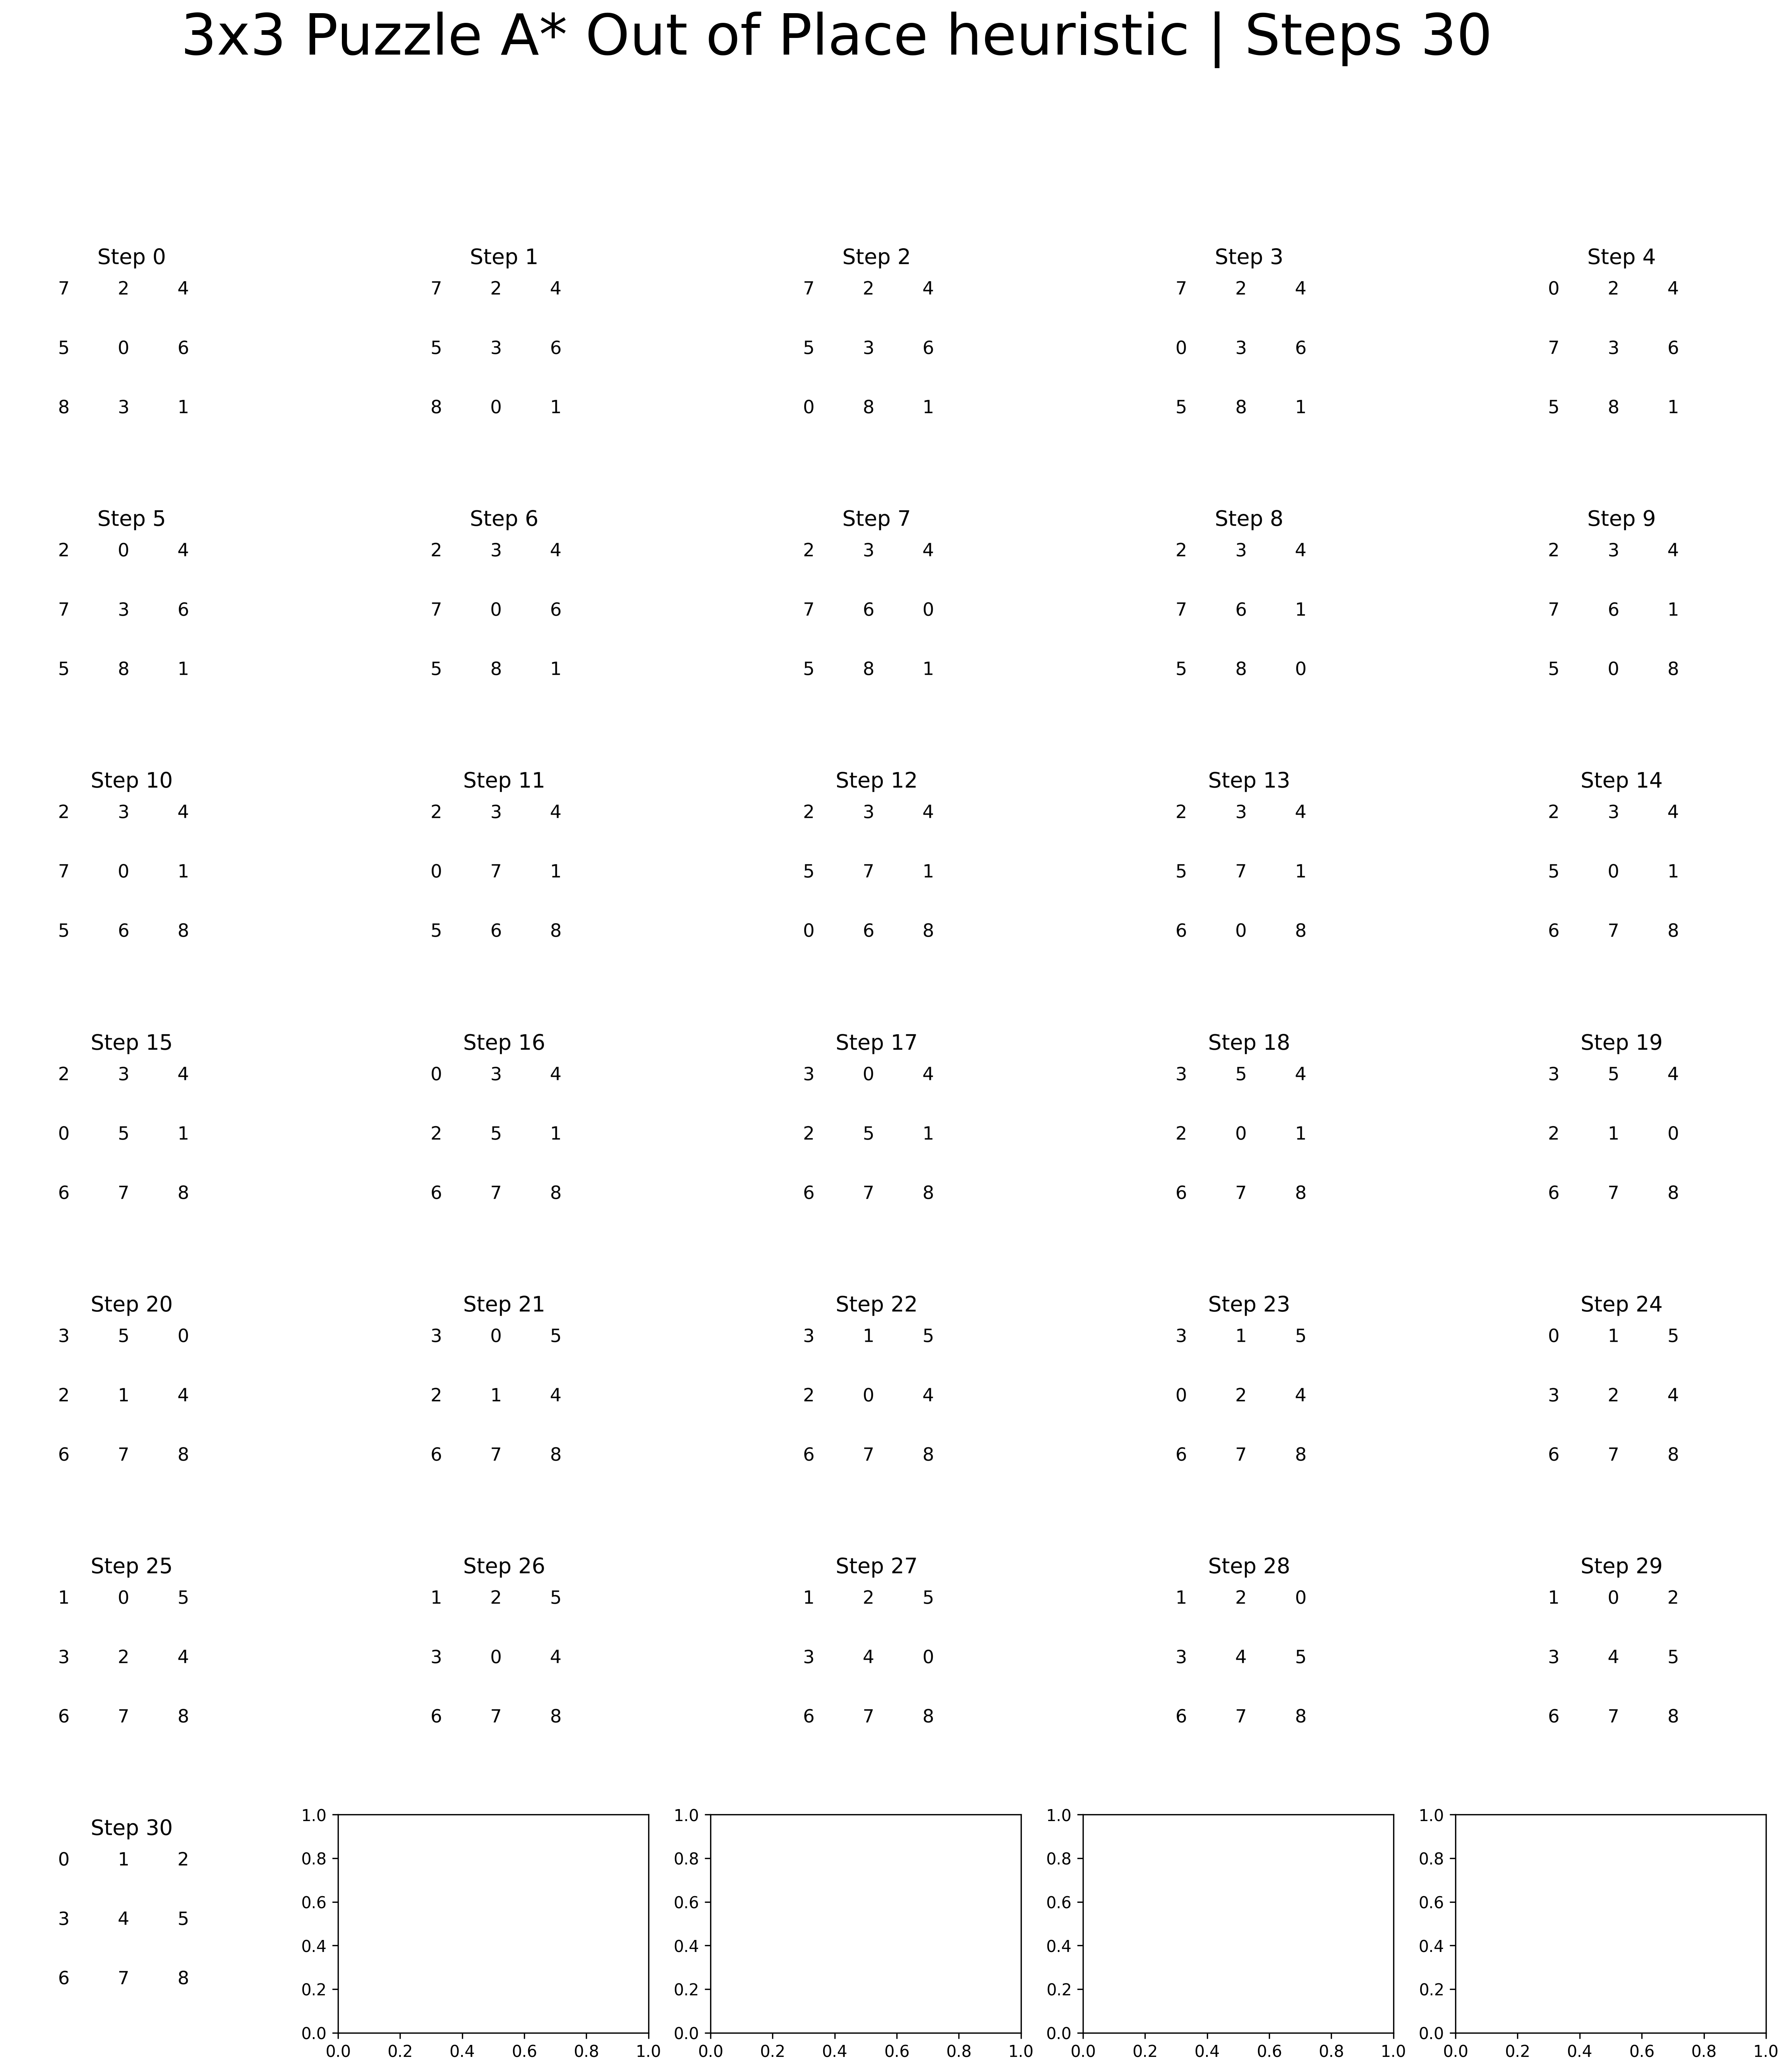

In [27]:
viz(
    path,
    plot_figs=True,
    title=f"3x3 Puzzle A* Out of Place heuristic | Steps {len(path)-1}",
)

In [28]:
_3x3_start = np.array([[7, 2, 4], [5, 0, 6], [8, 3, 1]])

_3x3_end = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])


for w in range(0, 10, 1):
    st = SlidingTile(_3x3_start, _3x3_end)
    visited, path = st.astar_path(st.heuristic_manhattan, w)
    print(f"W={w} Path={len(path)} Visited={len(visited)}")
# viz(
#     path,
#     plot_figs=True,
#     title=f"3x3 Puzzle A* Out of Place heuristic | Steps {len(path)}",
# )

W=0 Path=27 Visited=174082
W=1 Path=27 Visited=4601
W=2 Path=31 Visited=840
W=3 Path=37 Visited=628
W=4 Path=37 Visited=384
W=5 Path=37 Visited=344
W=6 Path=37 Visited=355
W=7 Path=37 Visited=355
W=8 Path=37 Visited=360
W=9 Path=37 Visited=373


### Bonus Question Summary

#### Result
- Got the optimal path of `26 steps` from the initial to the final configuration.
- Visualised the optimal in the matplotlib subplots in order, the title has number of steps on each supplot for reference.
- Tried with 2 heuristic functions and different weights to A* to appreciate the solution better.
- With not using heuristic and a simple BFS, it takes staggering `174,082` to converge.
- With `w=1`, the steps required plummets to `4601`. This is a clear indication of the power of heuristic in A*.
- We could also see that higher reliance on the heuristic here with way more reduced compute requirement at a very small cost of the path length.
- Tried with a simpler heuristic of counting states out of place and it is, evidently, not a good heuristic for this problem, with `steps=31` at `w=1`.
- PS: You can visualise it from viz function, use save_gif=True to save the gif of the solution.

#### Code changes
- Modified the `astar_path` to accept to handle movement of direct numpy arrays.
- `SlidingTile.bind` is a `fn` used to flatten numpy arrays and store as dictionaries
- `SlidingTile.possible_trajectories` function same as graphs built in the above tasks, but returns fully changed arrays in numpy
- Plots have title `len(path)-1`, its because in the code, initial state is also counted as a step, so the length of the path is 1 more than the number of steps, see the step by step in graph for reference.
